# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***other libraries*** in a variety of ways. Also, you will calibrate your model outputs.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU

After the ML Deployment Course, you will able to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

---
---


# #Determines
The dataset was collected from credit card transactions made by European cardholders in 2023, with sensitive information removed to ensure privacy and compliance with ethical guidelines. It has **550,000** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for small amount of all transactions.

**Feature Information:**

- **id:** Unique identifier for each transaction
- **V1-V28:** Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- **Amount:** The transaction amount
- **Class:** Binary label indicating whether the transaction is fraudulent (1) or not (0)

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables.
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with.

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase.

In the final step, you will prapare your model for deployment.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier
- Neural Network

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [4]:
!pip install imbalanced-learn deepchecks
!pip install statsmodels
!pip install numpy==1.26.4
print("modeller yuklendi")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 92.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_versio

modeller yuklendi


In [1]:

# --- Standard library ---
import json

# --- Third-party core ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Sklearn ---
from sklearn.model_selection import train_test_split
import joblib

# --- pandas utils ---
from pandas.util import hash_pandas_object

# --- statsmodels (VIF) ---
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# --- scikit-learn: preprocessing & pipeline ---
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

# --- scikit-learn: models ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# --- scikit-learn: model selection ---
from sklearn.model_selection import (
    StratifiedKFold,
    StratifiedGroupKFold,
    GridSearchCV,
)

# --- scikit-learn: metrics & displays ---
from sklearn.metrics import (
    average_precision_score,
    roc_auc_score,
    precision_recall_curve,
    PrecisionRecallDisplay,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    brier_score_loss,
    make_scorer,
)

# --- imbalanced-learn ---
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier

# --- deepchecks ---
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import (
    train_test_validation,
    model_evaluation,
    data_integrity,
)


In [11]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [3]:
df = pd.read_csv("creditcard.csv")
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
def quick_overview(df, name="df", target="Class"):
    print(f"\n=== {name}: shape={df.shape} ===")
    print("\nDtypes:")
    print(df.dtypes)
    print("\nHead:")
    print(df.head(3))
    print("\nMissing per column:")
    print(df.isna().sum().sort_values(ascending=False))
    # Duplicates
    dup_rows = df.duplicated().sum()
    dup_ids = df['id'].duplicated().sum() if 'id' in df.columns else None
    print(f"\nDuplicate rows: {dup_rows}" + (f" | Duplicate ids: {dup_ids}" if dup_ids is not None else ""))
    # Memory
    mem_mb = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Approx memory: {mem_mb:.2f} MB")
    # Target distribution
    if target in df.columns:
        cnt = df[target].value_counts().rename("count")
        pct = (df[target].value_counts(normalize=True)*100).rename("percent")
        print(f"\nTarget distribution ({name}):")
        print(pd.concat([cnt, pct.round(2)], axis=1))


In [5]:
quick_overview(df)



=== df: shape=(284807, 31) ===

Dtypes:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Head:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V2

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [6]:
import deepchecks
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import data_integrity

In [7]:
target = "Class"
dc_dataset = Dataset(df, label=target, cat_features=[])  # all features are numeric

In [8]:
# Run integrity checks
integrity_suite = data_integrity(n_samples=284807)
integrity_suite_result = integrity_suite.run(dc_dataset)

# Show summary in notebook
integrity_suite_result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Data Integrity Suite

In [9]:
pd.options.display.float_format = '{:,.10f}'.format


### Exploratory Data Analysis

In [10]:
df.describe()

Time                 V1                 V2  \
count 284,807.0000000000 284,807.0000000000 284,807.0000000000   
mean   94,813.8595750807       0.0000000000       0.0000000000   
std    47,488.1459545658       1.9586958039       1.6513085795   
min         0.0000000000     -56.4075096313     -72.7157275629   
25%    54,201.5000000000      -0.9203733844      -0.5985499135   
50%    84,692.0000000000       0.0181087992       0.0654855564   
75%   139,320.5000000000       1.3156416939       0.8037238712   
max   172,792.0000000000       2.4549299912      22.0577289905   

                      V3                 V4                 V5  \
count 284,807.0000000000 284,807.0000000000 284,807.0000000000   
mean       -0.0000000000       0.0000000000       0.0000000000   
std         1.5162550052       1.4158685749       1.3802467340   
min       -48.3255893624      -5.6831711982    -113.7433067111   
25%        -0.8903648382      -0.8486401163      -0.6915970709   
50%         0.1798463436      -0.0198465295      -0.0543358267   
75%         1.0271955425       0.7433412895       0.6119264397   
max         9.3825584328      16.8753440336      34.8016658767   

                      V6                 V7                 V8  \
count 284,807.0000000000 284,807.0000000000 284,807.0000000000   
mean        0.0000000000      -0.0000000000       0.0000000000   
std         1.3322710898       1.2370935982       1.1943529027   
min       -26.1605059358     -43.5572415712     -73.2167184553   
25%        -0.7682956085      -0.5540758790      -0.2086297440   
50%        -0.2741870765       0.0401030828       0.0223580364   
75%         0.3985648964       0.5704360729       0.3273458619   
max        73.3016255460     120.5894939452      20.0072083651   

                      V9  ...                V21                V22  \
count 284,807.0000000000  ... 284,807.0000000000 284,807.0000000000   
mean       -0.0000000000  ...       0.0000000000      -0.0000000000   
std         1.0986320892  ...       0.7345240144       0.7257015604   
min       -13.4340663182  ...     -34.8303821448     -10.9331436977   
25%        -0.6430975703  ...      -0.2283949468      -0.5423503727   
50%        -0.0514287316  ...      -0.0294501677       0.0067819425   
75%         0.5971390303  ...       0.1863772034       0.5285536353   
max        15.5949946071  ...      27.2028391573      10.5030900899   

                     V23                V24                V25  \
count 284,807.0000000000 284,807.0000000000 284,807.0000000000   
mean        0.0000000000       0.0000000000       0.0000000000   
std         0.6244602956       0.6056470678       0.5212780705   
min       -44.8077352038      -2.8366269187     -10.2953970750   
25%        -0.1618463450      -0.3545861364      -0.3171450541   
50%        -0.0111929303       0.0409760561       0.0165935016   
75%         0.1476420639       0.4395266002       0.3507155629   
max        22.5284116898       4.5845491369       7.5195886787   

                     V26                V27                V28  \
count 284,807.0000000000 284,807.0000000000 284,807.0000000000   
mean        0.0000000000      -0.0000000000      -0.0000000000   
std         0.4822270133       0.4036324950       0.3300832642   
min        -2.6045505528     -22.5656793208     -15.4300839055   
25%        -0.3269839259      -0.0708395293      -0.0529597930   
50%        -0.0521391080       0.0013421460       0.0112438316   
75%         0.2409521737       0.0910451197       0.0782799548   
max         3.5173456116      31.6121981061      33.8478078189   

                  Amount              Class  
count 284,807.0000000000 284,807.0000000000  
mean       88.3496192509       0.0017274856  
std       250.1201092402       0.0415271896  
min         0.0000000000       0.0000000000  
25%         5.6000000000       0.0000000000  
50%        22.0000000000       0.0000000000  
75%        77.1650000000       0.0000000000  
max    25,691.1600000000       1.0000

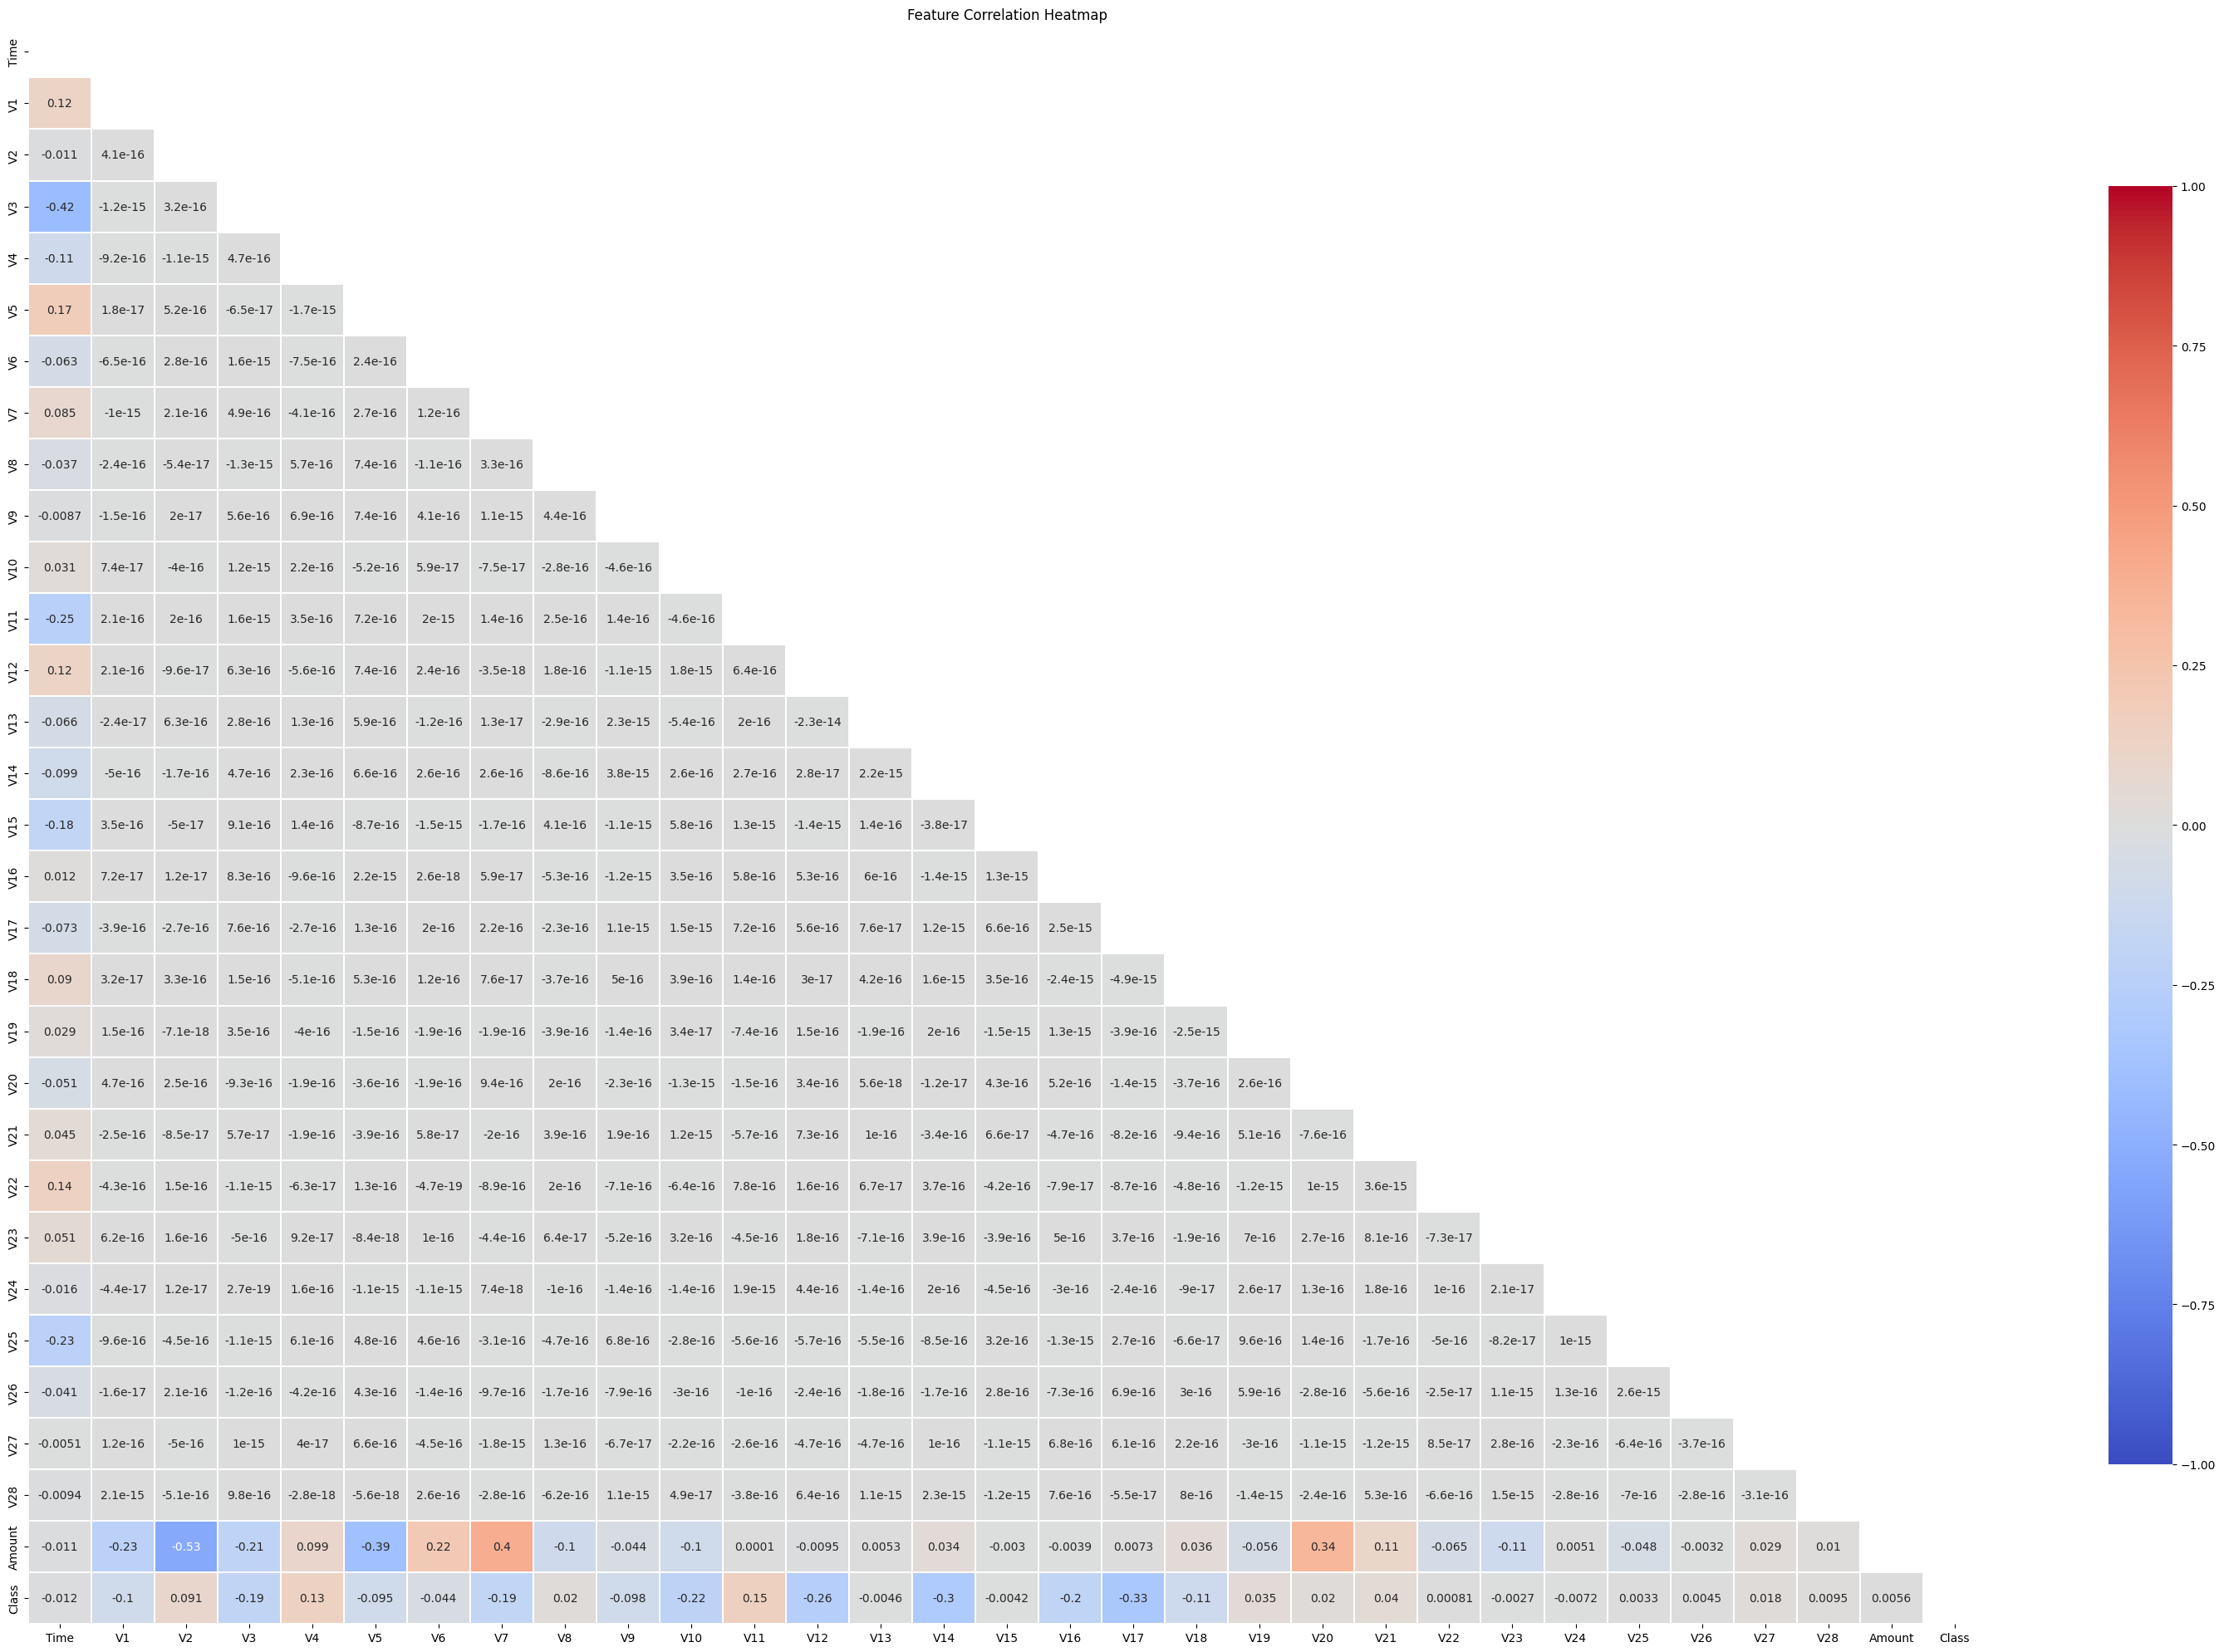

In [11]:
corr = df.corr(method="pearson")

plt.figure(figsize=(30,20))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", vmin=-1, vmax=1, center=0,
            linewidths=.1, cbar_kws={"shrink": .8})
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

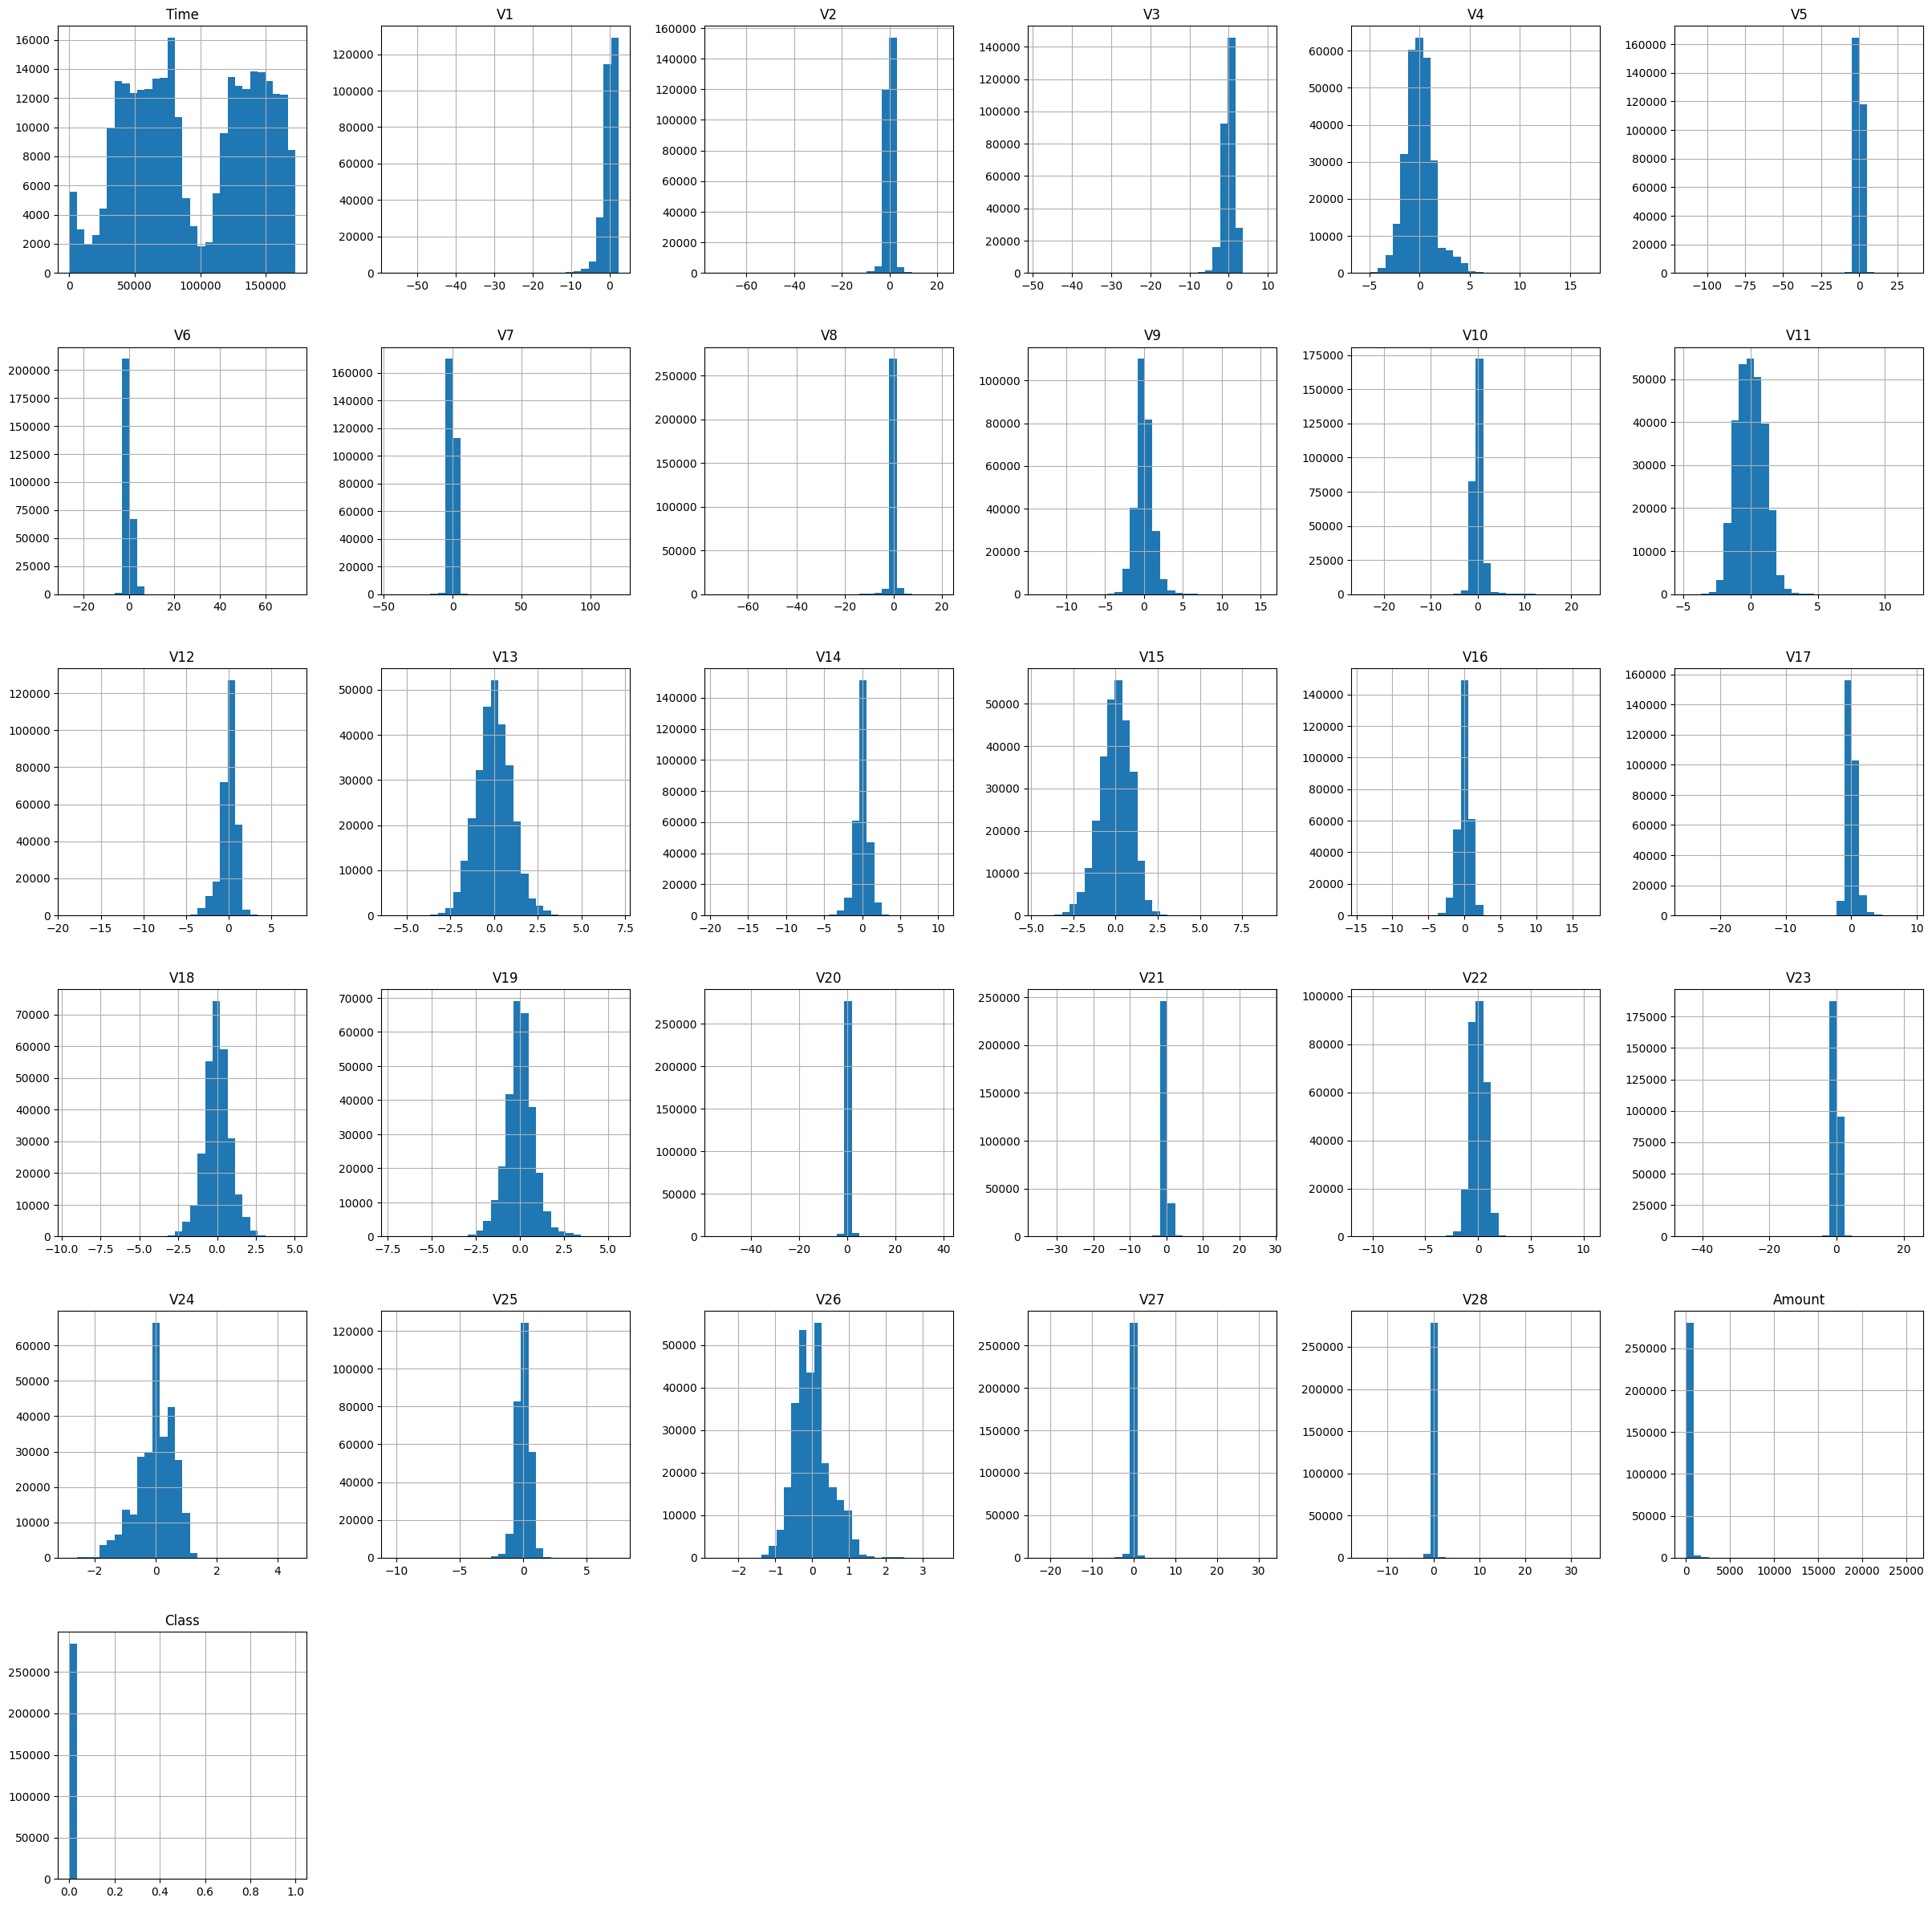

In [ ]:
df.hist(bins=30, figsize=(30,30))

In [ ]:
df.describe()

Time                 V1                 V2  \
count 284,807.0000000000 284,807.0000000000 284,807.0000000000   
mean   94,813.8595750807       0.0000000000       0.0000000000   
std    47,488.1459545662       1.9586958039       1.6513085795   
min         0.0000000000     -56.4075096313     -72.7157275629   
25%    54,201.5000000000      -0.9203733844      -0.5985499135   
50%    84,692.0000000000       0.0181087992       0.0654855564   
75%   139,320.5000000000       1.3156416939       0.8037238712   
max   172,792.0000000000       2.4549299912      22.0577289905   

                      V3                 V4                 V5  \
count 284,807.0000000000 284,807.0000000000 284,807.0000000000   
mean       -0.0000000000       0.0000000000       0.0000000000   
std         1.5162550052       1.4158685749       1.3802467340   
min       -48.3255893624      -5.6831711982    -113.7433067111   
25%        -0.8903648382      -0.8486401163      -0.6915970709   
50%         0.1798463436      -0.0198465295      -0.0543358267   
75%         1.0271955425       0.7433412895       0.6119264397   
max         9.3825584328      16.8753440336      34.8016658767   

                      V6                 V7                 V8  \
count 284,807.0000000000 284,807.0000000000 284,807.0000000000   
mean        0.0000000000      -0.0000000000       0.0000000000   
std         1.3322710898       1.2370935982       1.1943529027   
min       -26.1605059358     -43.5572415712     -73.2167184553   
25%        -0.7682956085      -0.5540758790      -0.2086297440   
50%        -0.2741870765       0.0401030828       0.0223580364   
75%         0.3985648964       0.5704360729       0.3273458619   
max        73.3016255460     120.5894939452      20.0072083651   

                      V9  ...                V21                V22  \
count 284,807.0000000000  ... 284,807.0000000000 284,807.0000000000   
mean       -0.0000000000  ...       0.0000000000      -0.0000000000   
std         1.0986320892  ...       0.7345240144       0.7257015604   
min       -13.4340663182  ...     -34.8303821448     -10.9331436977   
25%        -0.6430975703  ...      -0.2283949468      -0.5423503727   
50%        -0.0514287316  ...      -0.0294501677       0.0067819425   
75%         0.5971390303  ...       0.1863772034       0.5285536353   
max        15.5949946071  ...      27.2028391573      10.5030900899   

                     V23                V24                V25  \
count 284,807.0000000000 284,807.0000000000 284,807.0000000000   
mean        0.0000000000       0.0000000000       0.0000000000   
std         0.6244602956       0.6056470678       0.5212780705   
min       -44.8077352038      -2.8366269187     -10.2953970750   
25%        -0.1618463450      -0.3545861364      -0.3171450541   
50%        -0.0111929303       0.0409760561       0.0165935016   
75%         0.1476420639       0.4395266002       0.3507155629   
max        22.5284116898       4.5845491369       7.5195886787   

                     V26                V27                V28  \
count 284,807.0000000000 284,807.0000000000 284,807.0000000000   
mean        0.0000000000      -0.0000000000      -0.0000000000   
std         0.4822270133       0.4036324950       0.3300832642   
min        -2.6045505528     -22.5656793208     -15.4300839055   
25%        -0.3269839259      -0.0708395293      -0.0529597930   
50%        -0.0521391080       0.0013421460       0.0112438316   
75%         0.2409521737       0.0910451197       0.0782799548   
max         3.5173456116      31.6121981061      33.8478078189   

                  Amount              Class  
count 284,807.0000000000 284,807.0000000000  
mean       88.3496192509       0.0017274856  
std       250.1201092402       0.0415271896  
min         0.0000000000       0.0000000000  
25%         5.6000000000       0.0000000000  
50%        22.0000000000       0.0000000000  
75%        77.1650000000       0.0000000000  
max    25,691.1600000000       1.0000

In [12]:
# Amount values in ascending order
amount_sorted = df['Amount'].sort_values(ignore_index=True)

#
amount_sorted.head(50)

0    0.0000000000
1    0.0000000000
2    0.0000000000
3    0.0000000000
4    0.0000000000
5    0.0000000000
6    0.0000000000
7    0.0000000000
8    0.0000000000
9    0.0000000000
10   0.0000000000
11   0.0000000000
12   0.0000000000
13   0.0000000000
14   0.0000000000
15   0.0000000000
16   0.0000000000
17   0.0000000000
18   0.0000000000
19   0.0000000000
20   0.0000000000
21   0.0000000000
22   0.0000000000
23   0.0000000000
24   0.0000000000
25   0.0000000000
26   0.0000000000
27   0.0000000000
28   0.0000000000
29   0.0000000000
30   0.0000000000
31   0.0000000000
32   0.0000000000
33   0.0000000000
34   0.0000000000
35   0.0000000000
36   0.0000000000
37   0.0000000000
38   0.0000000000
39   0.0000000000
40   0.0000000000
41   0.0000000000
42   0.0000000000
43   0.0000000000
44   0.0000000000
45   0.0000000000
46   0.0000000000
47   0.0000000000
48   0.0000000000
49   0.0000000000
Name: Amount, dtype: float64

In [13]:
# Aralık ve kapsadığı saat

df['Time'].min(), df['Time'].max(), (df['Time'].max()-df['Time'].min())/3600

(0.0, 172792.0, 47.99777777777778)

In [14]:

tmp = df.copy()
tmp['hour'] = ((tmp['Time'] % 86400) // 3600).astype(int)
hour_rate = tmp.groupby('hour')['Class'].mean()
#
hour_rate

hour
0    0.0007797271
1    0.0023696682
2    0.0171274038
3    0.0048682703
4    0.0104119511
5    0.0036789298
6    0.0021945867
7    0.0031754798
8    0.0008758272
9    0.0010102286
10   0.0004819858
11   0.0031442810
12   0.0011024643
13   0.0011064107
14   0.0013880507
15   0.0015794909
16   0.0013371422
17   0.0017938884
18   0.0019367334
19   0.0012141351
20   0.0010742421
21   0.0009038016
22   0.0005828638
23   0.0019199122
Name: Class, dtype: float64

In [15]:
# Baseline fraud rate
p_all = tmp['Class'].mean()

# Per-hour count & rate (+ lift vs baseline)
hourly = (tmp.groupby('hour')['Class']
            .agg(n='size', rate='mean')
            .reset_index())
hourly['lift'] = (hourly['rate'] / p_all).round(2)
hourly.sort_values('rate', ascending=False)

hour      n         rate         lift
2      2   3328 0.0171274038 9.9100000000
4      4   2209 0.0104119511 6.0300000000
3      3   3492 0.0048682703 2.8200000000
5      5   2990 0.0036789298 2.1300000000
7      7   7243 0.0031754798 1.8400000000
11    11  16856 0.0031442810 1.8200000000
1      1   4220 0.0023696682 1.3700000000
6      6   4101 0.0021945867 1.2700000000
18    18  17039 0.0019367334 1.1200000000
23    23  10938 0.0019199122 1.1100000000
17    17  16166 0.0017938884 1.0400000000
15    15  16461 0.0015794909 0.9100000000
14    14  16570 0.0013880507 0.8000000000
16    16  16453 0.0013371422 0.7700000000
19    19  15649 0.0012141351 0.7000000000
13    13  15365 0.0011064107 0.6400000000
12    12  15420 0.0011024643 0.6400000000
20    20  16756 0.0010742421 0.6200000000
9      9  15838 0.0010102286 0.5800000000
21    21  17703 0.0009038016 0.5200000000
8      8  10276 0.0008758272 0.5100000000
0      0   7695 0.0007797271 0.4500000000
22    22  15441 0.0005828638 0.3400000000
10    10  16598 0.0004819858 0.2800000000

In [ ]:
# İki gün karşılaştırması (df değişmez)
tmp = df.copy()
tmp['hour'] = ((tmp['Time'] % 86400) // 3600).astype(int)
tmp['day']  = (tmp['Time'] // 86400).astype(int)  # 0 veya 1

stab = (tmp.groupby(['day','hour'])['Class']
          .agg(n='size', rate='mean')
          .reset_index())
stab.pivot(index='hour', columns='day', values='rate')

day             0            1
hour                          
0    0.0005046682 0.0010718114
1    0.0009021200 0.0039940090
2    0.0133248731 0.0205479452
3    0.0071389347 0.0023937762
4    0.0055452865 0.0150842946
5    0.0065437240 0.0000000000
6    0.0016384489 0.0026431718
7    0.0068289786 0.0000000000
8    0.0009654373 0.0007847754
9    0.0019040366 0.0001256281
10   0.0002413127 0.0007220217
11   0.0050487261 0.0011991846
12   0.0011639938 0.0010405827
13   0.0011865524 0.0010282776
14   0.0016191307 0.0011708231
15   0.0017866258 0.0013913043
16   0.0017980992 0.0009230414
17   0.0015224562 0.0020521487
18   0.0017427675 0.0021347249
19   0.0008756567 0.0015676029
20   0.0008908686 0.0012860082
21   0.0014148560 0.0002561475
22   0.0003341874 0.0009282178
23   0.0027951332 0.0008237232

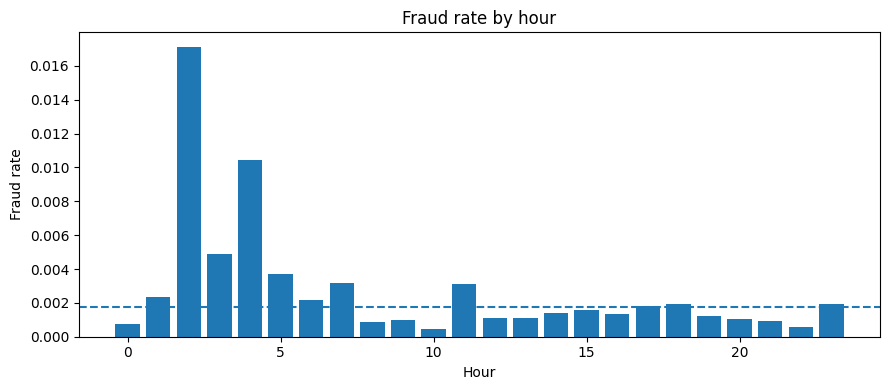

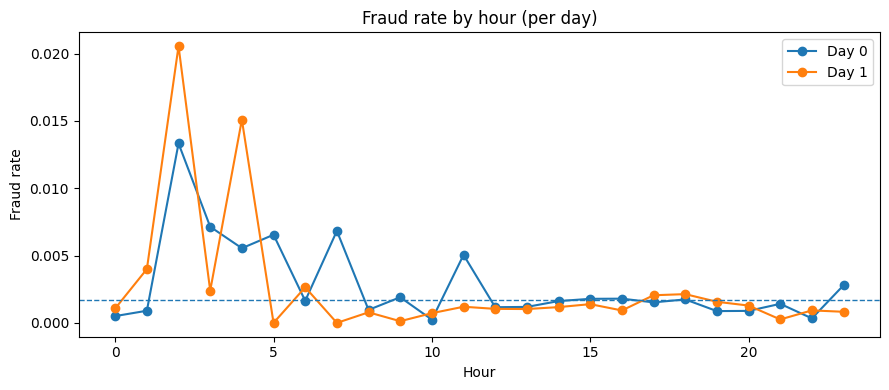

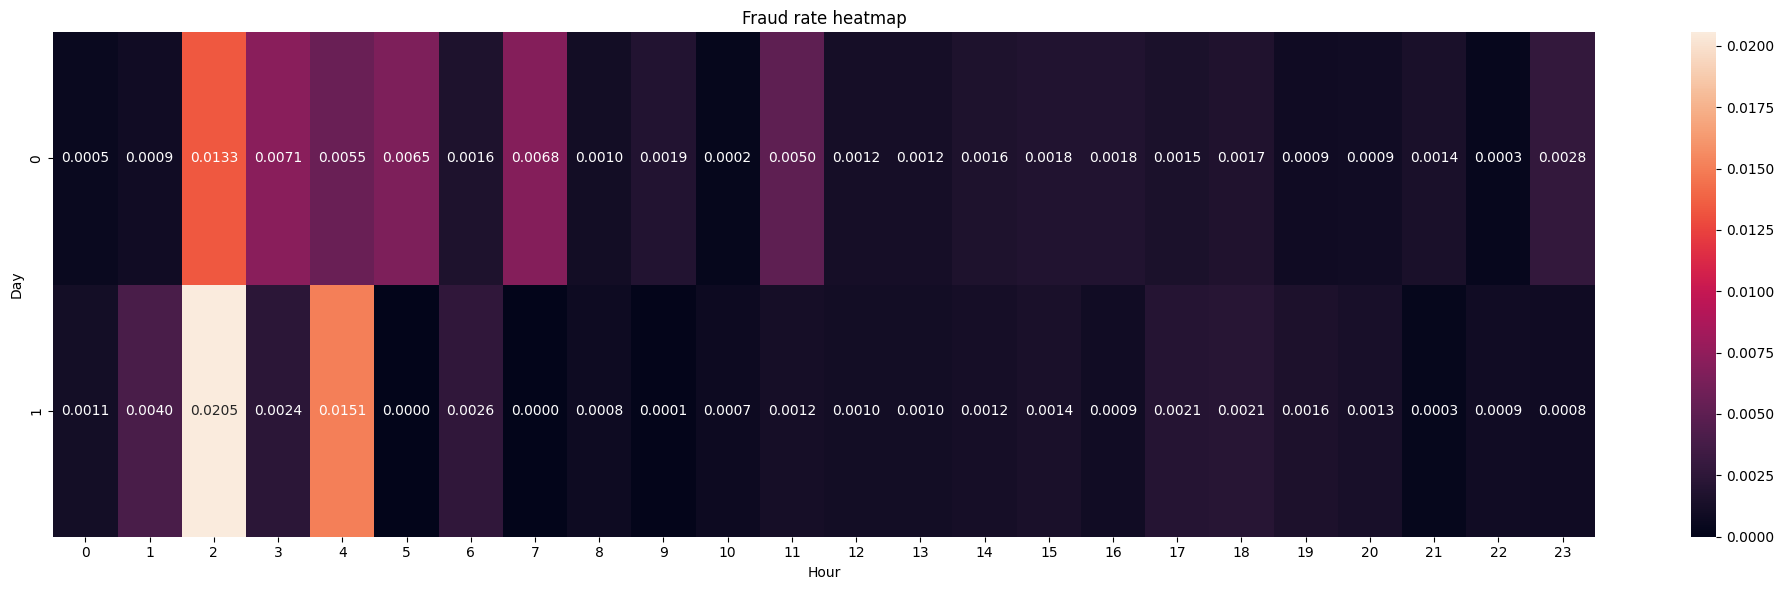

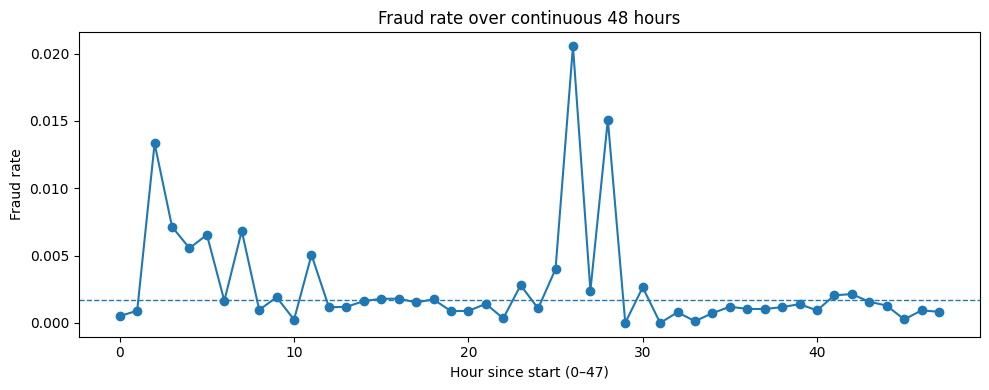

In [ ]:

# Prepare (df değişmez)
tmp = df.copy()
tmp['hour'] = ((tmp['Time'] % 86400) // 3600).astype(int)
tmp['day']  = (tmp['Time'] // 86400).astype(int)

p_all = tmp['Class'].mean()
hourly = (tmp.groupby('hour')['Class'].agg(n='size', rate='mean')
            .reset_index().sort_values('hour'))
stab = (tmp.groupby(['day','hour'])['Class'].mean()
          .reset_index(name='rate'))
pivot = stab.pivot(index='hour', columns='day', values='rate').sort_index()

# 1) Hourly fraud rate (baseline dashed)
plt.figure(figsize=(9,4))
plt.bar(hourly['hour'], hourly['rate'])
plt.axhline(p_all, linestyle='--')
plt.xlabel('Hour'); plt.ylabel('Fraud rate'); plt.title('Fraud rate by hour')
plt.tight_layout(); plt.show()

# 2) Day 0 vs Day 1 (line)
plt.figure(figsize=(9,4))
for d in pivot.columns:
    plt.plot(pivot.index, pivot[d], marker='o', label=f'Day {d}')
plt.axhline(p_all, linestyle='--', linewidth=1)
plt.xlabel('Hour'); plt.ylabel('Fraud rate'); plt.title('Fraud rate by hour (per day)')
plt.legend(); plt.tight_layout(); plt.show()

# 3) Heatmap (hour × day)
plt.figure(figsize=(20,6))
sns.heatmap(pivot.T, annot=True, fmt=".4f", cbar=True)
plt.xlabel('Hour'); plt.ylabel('Day'); plt.title('Fraud rate heatmap')
plt.tight_layout(); plt.show()

tmp = df.copy()
tmp['h48'] = (tmp['Time'] // 3600).astype(int)  # 0..47
p_all = tmp['Class'].mean()

cont = (tmp.groupby('h48')['Class']
          .mean()
          .reindex(range(48)))  # ensure full 0..47 axis

plt.figure(figsize=(10,4))
plt.plot(cont.index, cont.values, marker='o')
plt.axhline(p_all, linestyle='--', linewidth=1)
plt.xlabel('Hour since start (0–47)')
plt.ylabel('Fraud rate')
plt.title('Fraud rate over continuous 48 hours')
plt.tight_layout(); plt.show()


In [ ]:
tmp['h48'] = (tmp['Time'] // 3600).astype(int)

fraud_per_hour = (tmp.loc[tmp['Class'] == 1]
                    .groupby('h48')
                    .size()
                    .reindex(range(48), fill_value=0)
                    .astype(int))
fraud_per_hour  # index: 0..47, values: fraud count

h48
0      2
1      2
2     21
3     13
4      6
5     11
6      3
7     23
8      5
9     15
10     2
11    43
12     9
13     9
14    13
15    14
16    14
17    12
18    15
19     7
20     8
21    14
22     3
23    17
24     4
25     8
26    36
27     4
28    17
29     0
30     6
31     0
32     4
33     1
34     6
35    10
36     8
37     8
38    10
39    12
40     8
41    17
42    18
43    12
44    10
45     2
46     6
47     4
dtype: int64

### Data Cleaning
Check Missing Values and Outliers

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Tree models (RF/XGB): scaling usually not needed.

# Linear/SVM/NN/KNN: scaling important; prefer RobustScaler

In [ ]:

def plot_outliers(df, cols, bins=80, show_fences=False):
    """
    Quick outlier view: histogram + lines for mean, Q1, Q3.
    Optional Tukey fences (Q1-1.5*IQR, Q3+1.5*IQR) if show_fences=True.
    """
    if isinstance(cols, str): cols = [cols]
    for c in cols:
        s = df[c].dropna()
        q1, q3 = s.quantile([0.25, 0.75])
        iqr = q3 - q1
        mean = s.mean()
        lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr

        plt.figure(figsize=(6,3.5))
        sns.histplot(s, bins=bins)
        plt.axvline(mean, linewidth=2, label=f"Mean: {mean:.2f}")
        plt.axvline(q1, linestyle="--", label=f"Q1: {q1:.2f}")
        plt.axvline(q3, linestyle="--", label=f"Q3: {q3:.2f}")
        if show_fences:
            plt.axvline(lower, linestyle=":", label=f"Lower fence: {lower:.2f}")
            plt.axvline(upper, linestyle=":", label=f"Upper fence: {upper:.2f}")
        plt.title(f"{c} | IQR={iqr:.2f}")
        plt.legend(loc="best", fontsize=8)
        plt.tight_layout()
        plt.show()


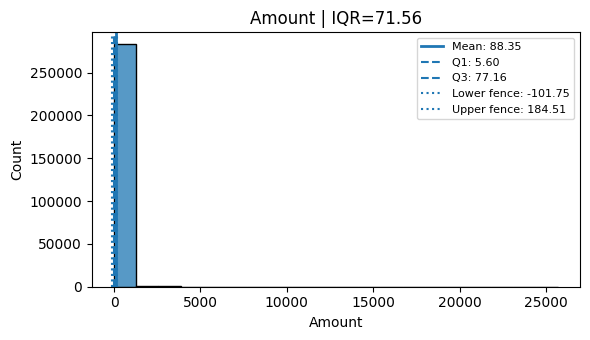

In [ ]:

plot_outliers(df, ['Amount'], bins=20, show_fences=True)

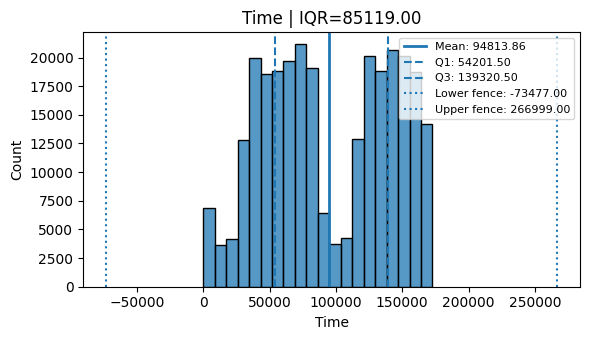

In [ ]:
plot_outliers(df, ['Time'], bins=20, show_fences=True)

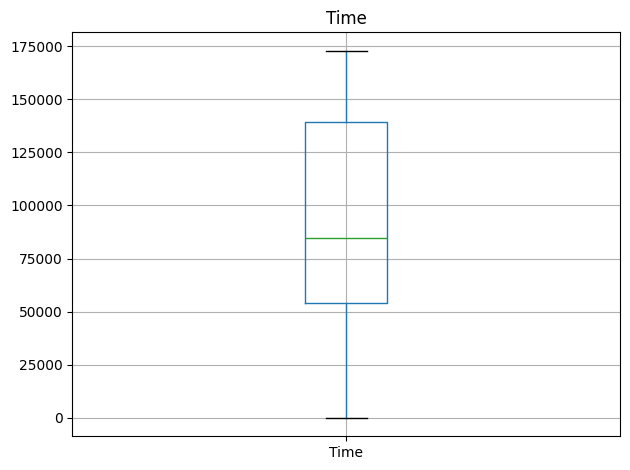

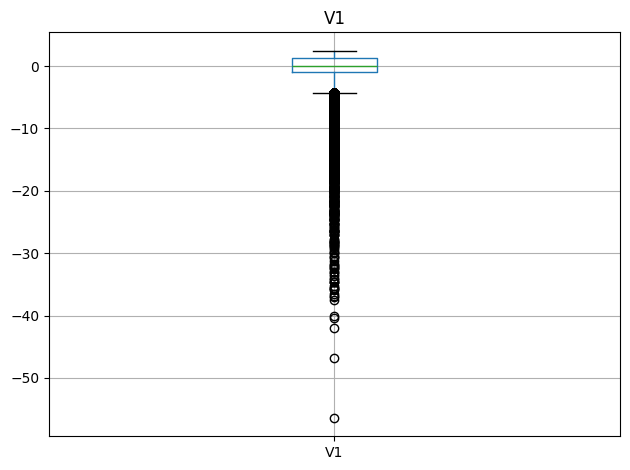

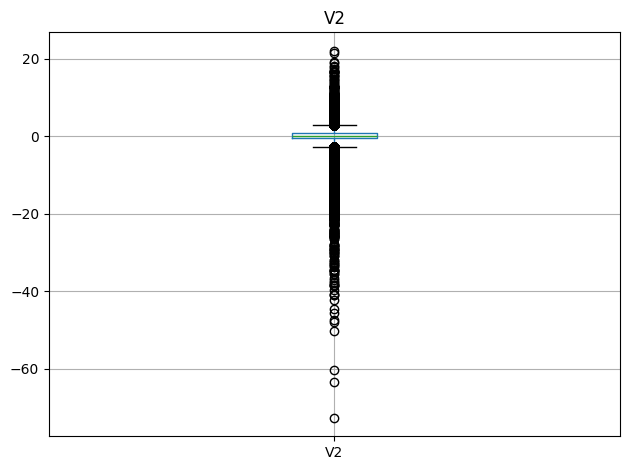

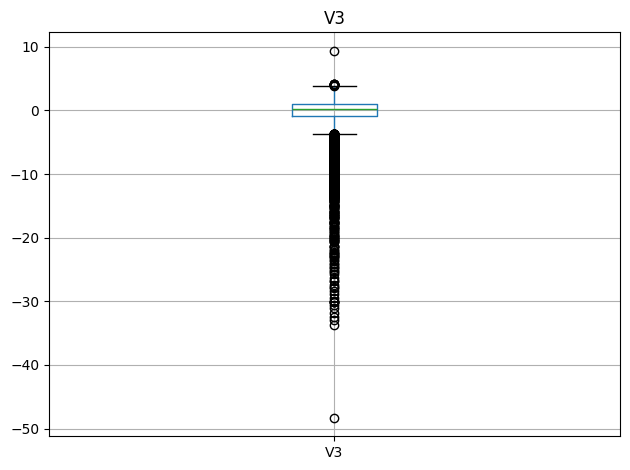

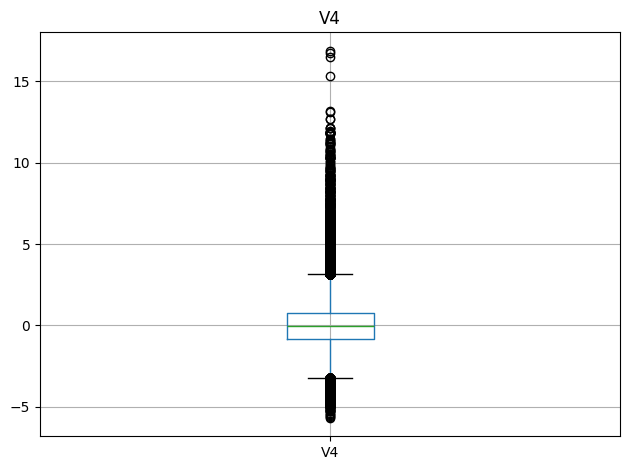

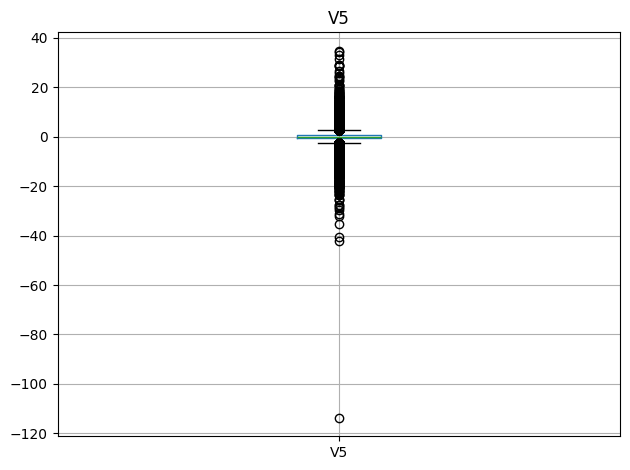

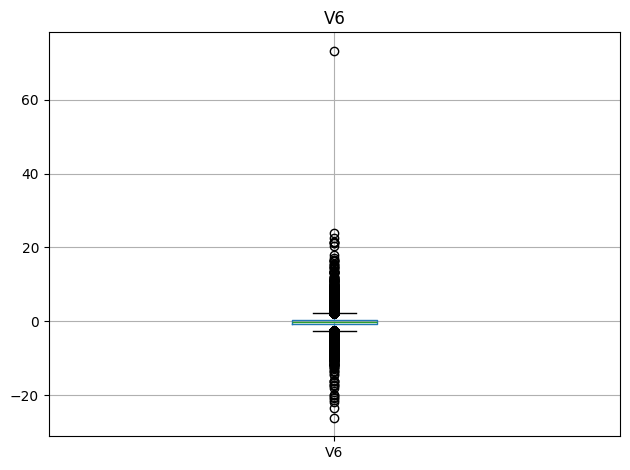

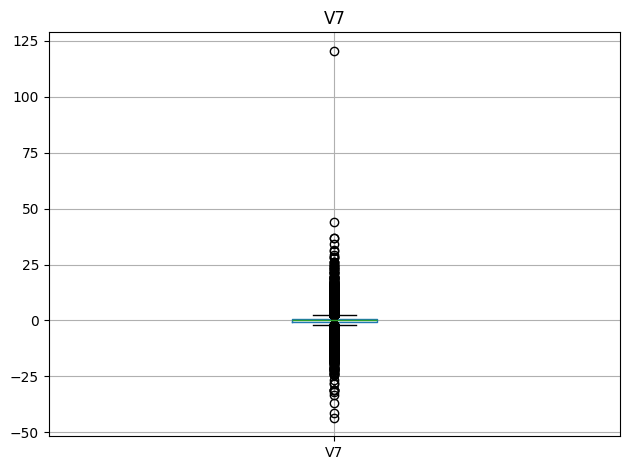

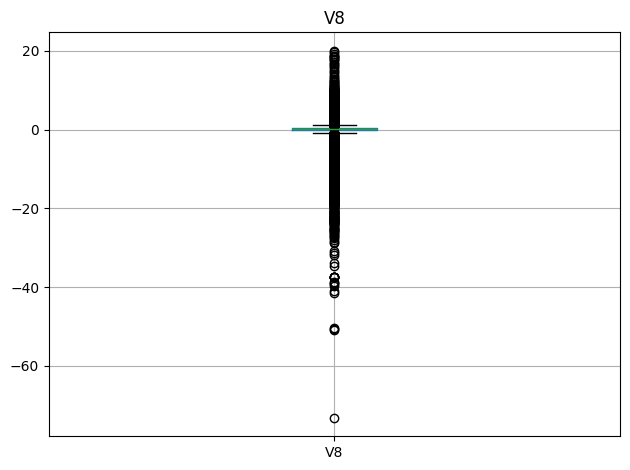

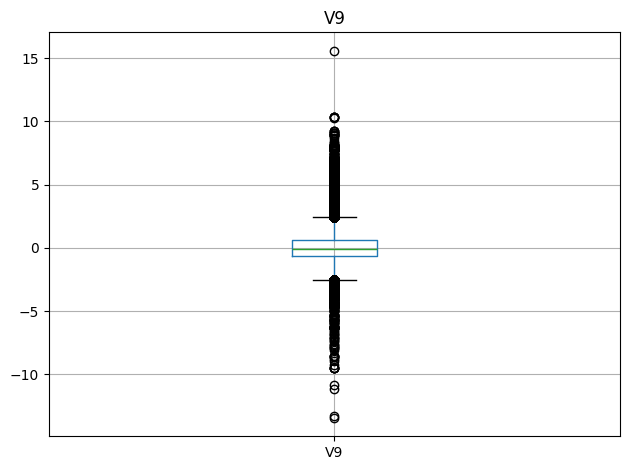

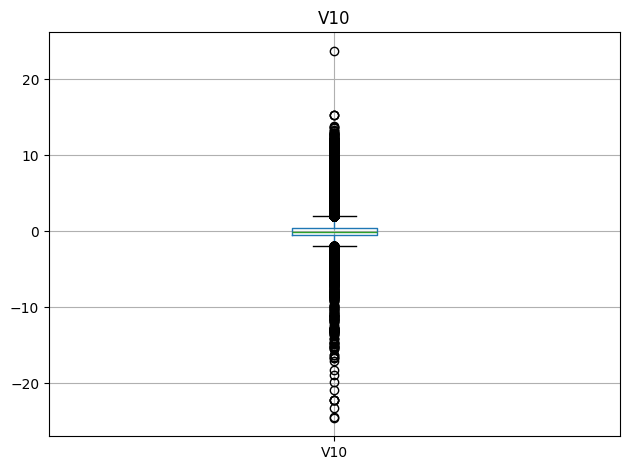

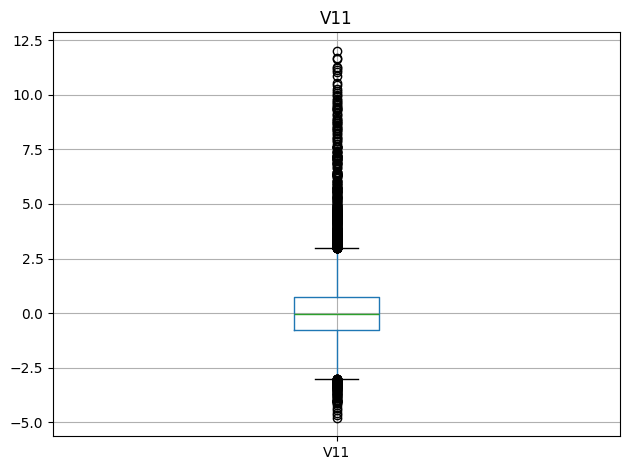

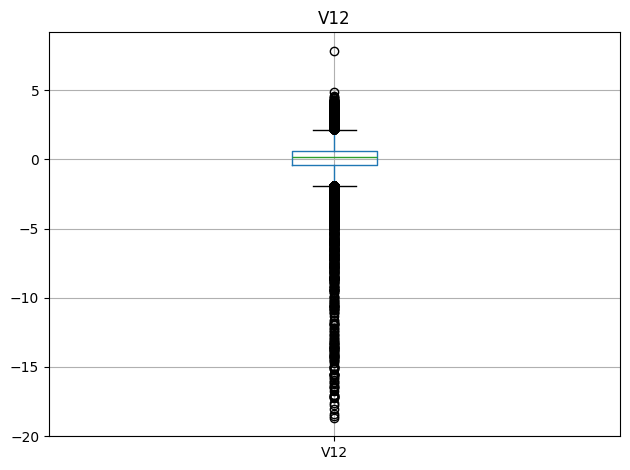

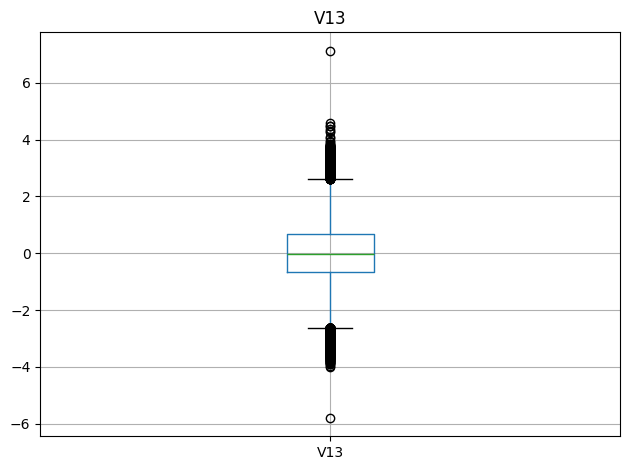

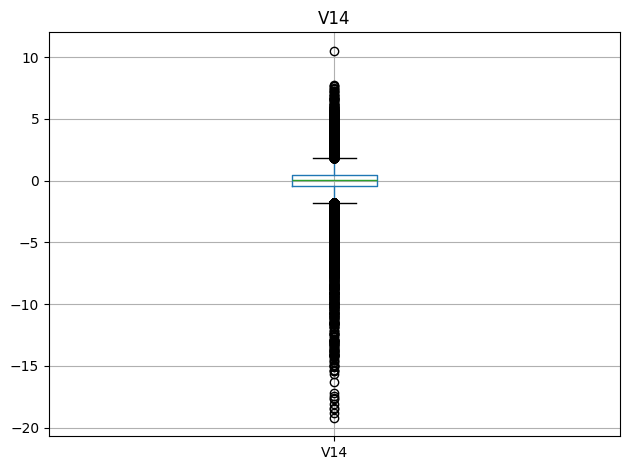

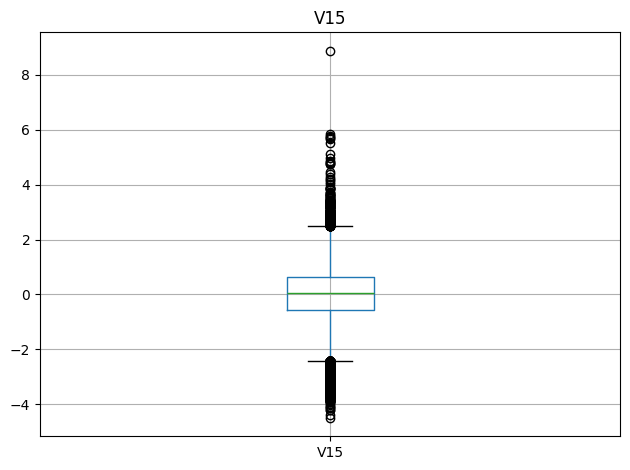

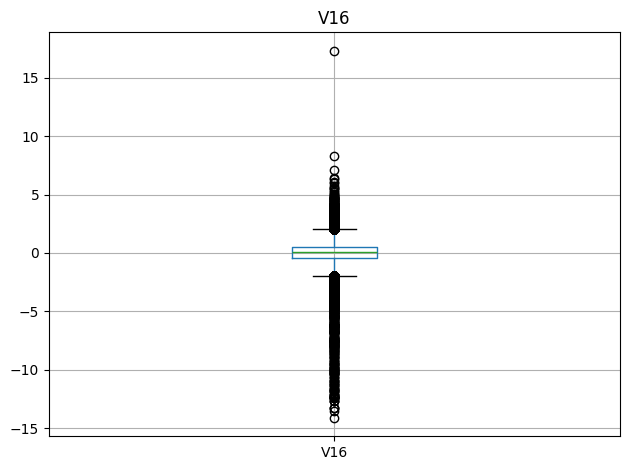

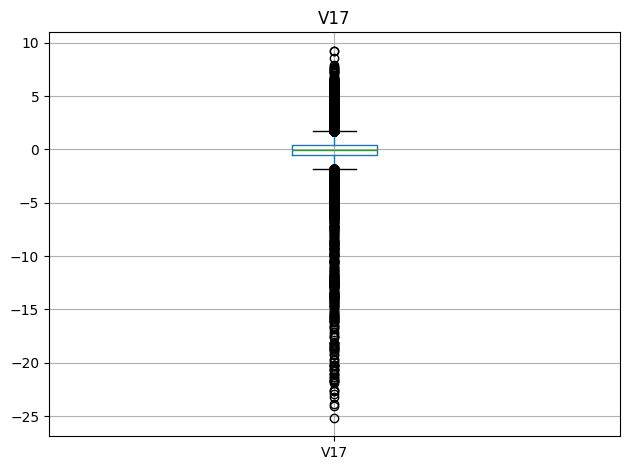

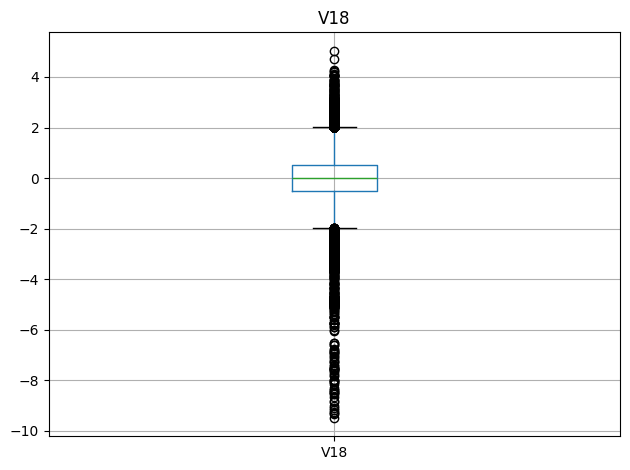

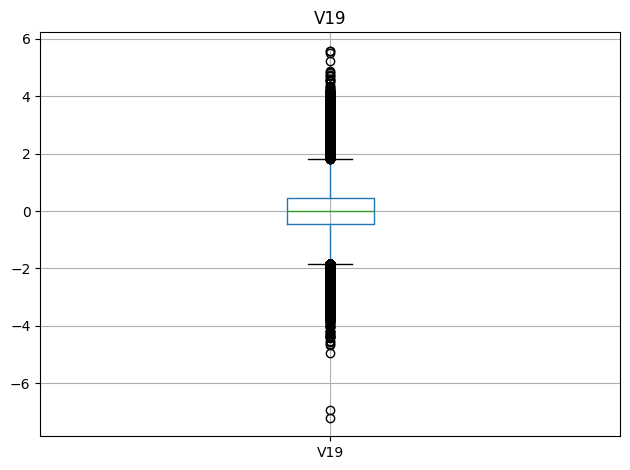

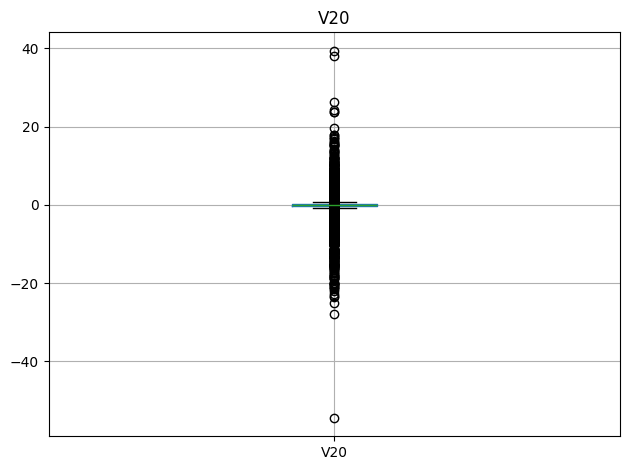

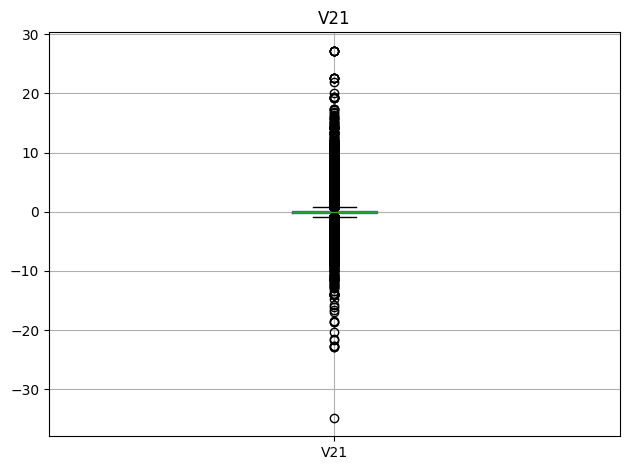

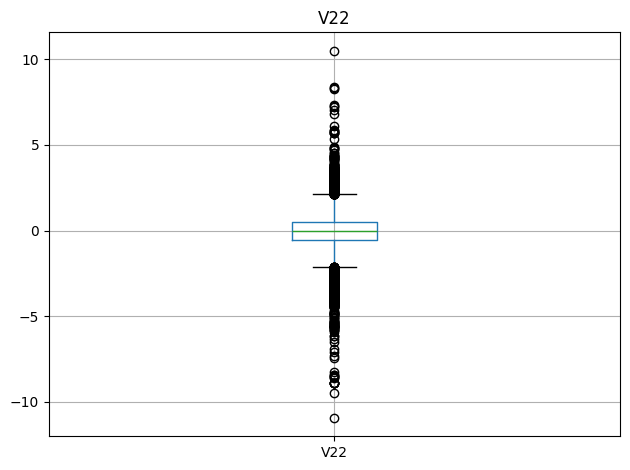

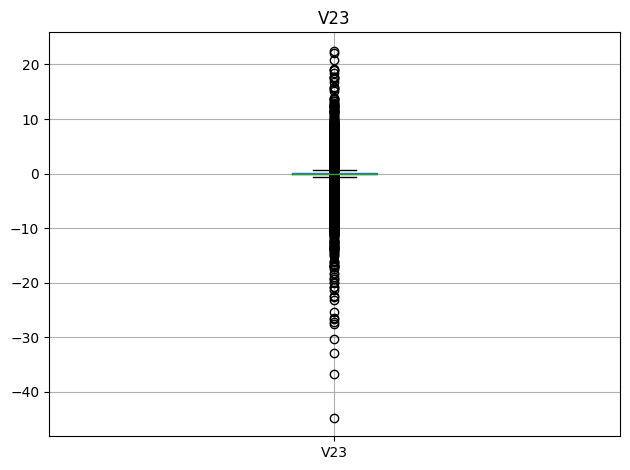

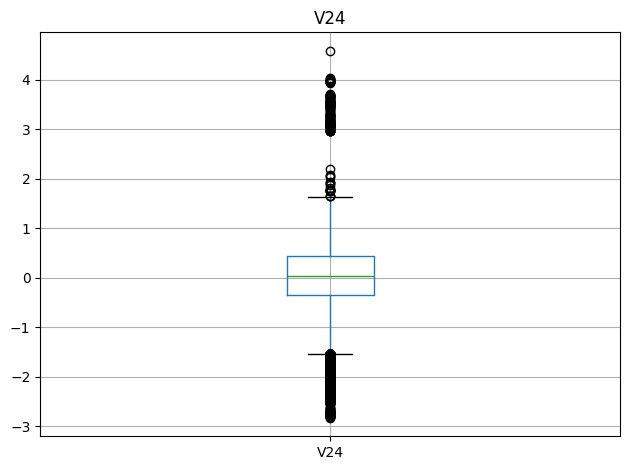

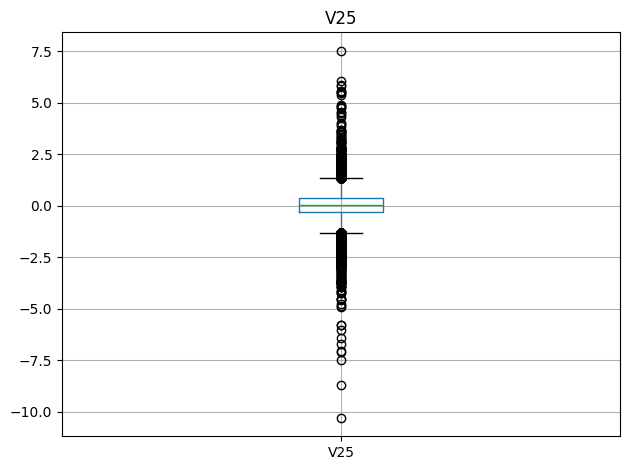

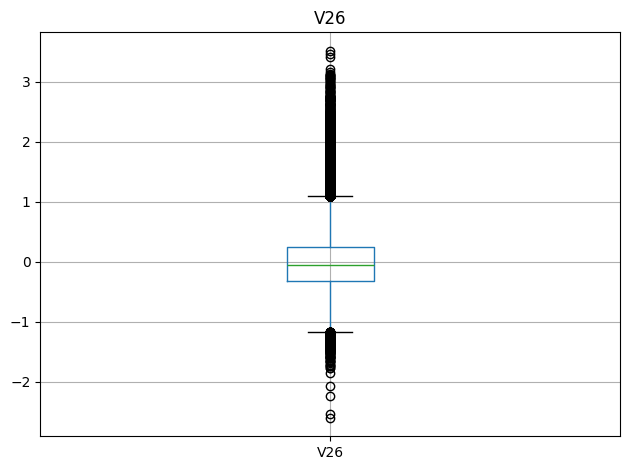

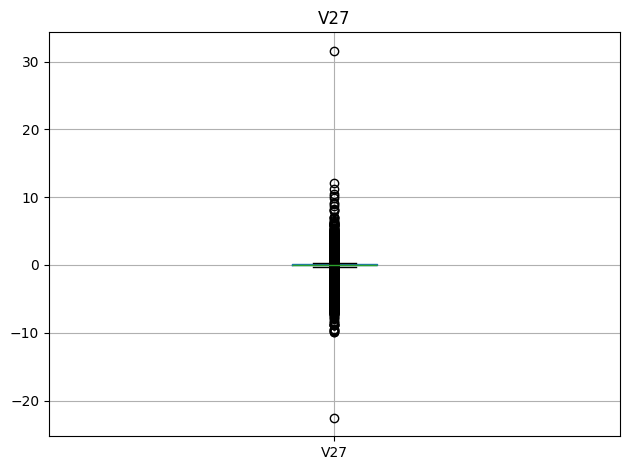

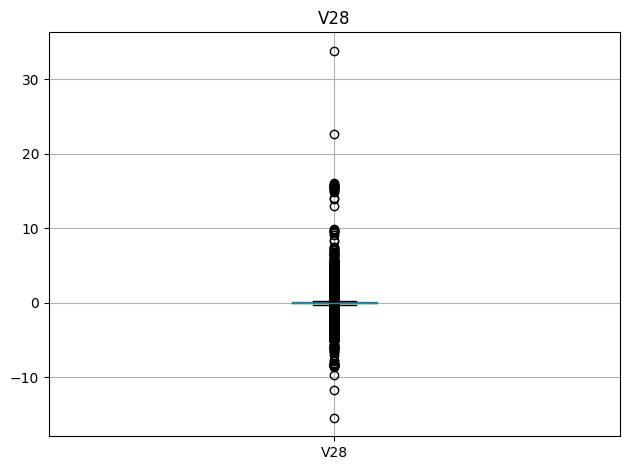

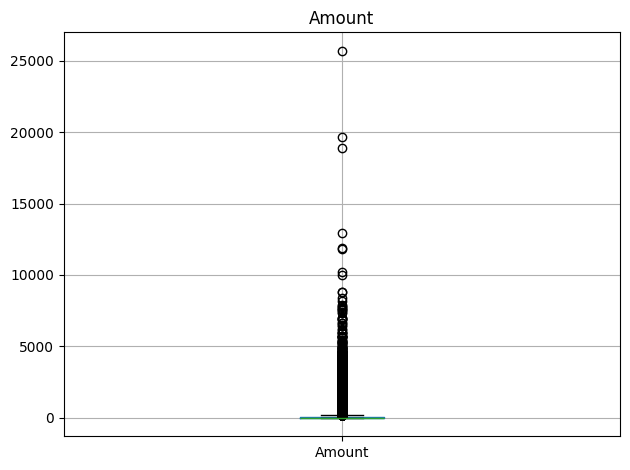

In [ ]:

num_cols = [c for c in df.columns if c != "Class" and np.issubdtype(df[c].dtype, np.number)]

# A) Her sütun için TEK boxplot (Class ayrımı yok)
for c in num_cols:
    df.boxplot(column=c)
    plt.title(c); plt.tight_layout(); plt.show()



In [5]:
# duplicates

df.duplicated().sum()

1081

In [ ]:
# 4) Rows with same features but different label (potential label conflict)
conflict = df.drop_duplicates().groupby(df.columns.tolist()).size()
# In your case, since there's no 'id', we usually check:
conflicting = df.groupby(df.drop(columns="Class").columns.tolist())['Class'].nunique()
conflicts = conflicting[conflicting > 1]
print("Conflicting duplicates (same features, different Class):", len(conflicts))

Conflicting duplicates (same features, different Class): 0


In [17]:
df
# was 284807 rows × 31 columns
# now 283726 rows × 31 columns


Time             V1            V2            V3  \
0            0.0000000000  -1.3598071337 -0.0727811733  2.5363467380   
1            0.0000000000   1.1918571113  0.2661507121  0.1664801134   
2            1.0000000000  -1.3583540616 -1.3401630747  1.7732093426   
3            1.0000000000  -0.9662717116 -0.1852260081  1.7929933396   
4            2.0000000000  -1.1582330935  0.8777367548  1.5487178465   
...                   ...            ...           ...           ...   
284802 172,786.0000000000 -11.8811178854 10.0717849710 -9.8347834574   
284803 172,787.0000000000  -0.7327886707 -0.0550804899  2.0350297453   
284804 172,788.0000000000   1.9195650098 -0.3012538460 -3.2496398141   
284805 172,788.0000000000  -0.2404400497  0.5304825131  0.7025102301   
284806 172,792.0000000000  -0.5334125220 -0.1897333370  0.7033373670   

                  V4            V5            V6            V7            V8  \
0       1.3781552243 -0.3383207699  0.4623877778  0.2395985541  0.0986979013   
1       0.4481540785  0.0600176493 -0.0823608088 -0.0788029833  0.0851016549   
2       0.3797795930 -0.5031981333  1.8004993808  0.7914609565  0.2476757866   
3      -0.8632912750 -0.0103088796  1.2472031675  0.2376089398  0.3774358747   
4       0.4030339340 -0.4071933773  0.0959214625  0.5929407454 -0.2705326772   
...              ...           ...           ...           ...           ...   
284802 -2.0666556846 -5.3644727810 -2.6068373309 -4.9182154312  7.3053340208   
284803 -0.7385885844  0.8682293989  1.0584152722  0.0243296959  0.2948686985   
284804 -0.5578281248  2.6305151201  3.0312600978 -0.2968265271  0.7084171850   
284805  0.6897991680 -0.3779611344  0.6237077221 -0.6861799863  0.6791454598   
284806 -0.5062712403 -0.0125456788 -0.6496166857  1.5770062544 -0.4146504076   

                  V9  ...           V21           V22           V23  \
0       0.3637869696  ... -0.0183067779  0.2778375756 -0.1104739102   
1      -0.2554251281  ... -0.2257752480 -0.6386719528  0.1012880213   
2      -1.5146543226  ...  0.2479981535  0.7716794019  0.9094122623   
3      -1.3870240627  ... -0.1083004520  0.0052735968 -0.1903205187   
4       0.8177393082  ... -0.0094306971  0.7982784946 -0.1374580796   
...              ...  ...           ...           ...           ...   
284802  1.9144282734  ...  0.2134541084  0.1118637360  1.0144798972   
284803  0.5848000173  ...  0.2142053417  0.9243835849  0.0124630383   
284804  0.4324540476  ...  0.2320450359  0.5782290099 -0.0375008550   
284805  0.3920867125  ...  0.2652449164  0.8000487415 -0.1632979444   
284806  0.4861795053  ...  0.2610573308  0.6430784378  0.3767770142   

                 V24           V25           V26           V27           V28  \
0       0.0669280749  0.1285393583 -0.1891148439  0.1335583767 -0.0210530535   
1      -0.3398464755  0.1671704044  0.1258945324 -0.0089830991  0.0147241692   
2      -0.6892809565 -0.3276418337 -0.1390965715 -0.0553527940 -0.0597518406   
3      -1.1755753319  0.6473760346 -0.2219288445  0.0627228487  0.0614576285   
4       0.1412669838 -0.2060095876  0.5022922242  0.2194222295  0.2151531475   
...              ...           ...           ...           ...           ...   
284802 -0.5093484532  1.4368069070  0.2500342796  0.9436511715  0.8237309615   
284803 -1.0162256687 -0.6066239859 -0.3952550657  0.0684724700 -0.0535273892   
284804  0.6401338813  0.2657454532 -0.0873705959  0.0044547721 -0.0265608286   
284805  0.1232052437 -0.5691588642  0.5466684622  0.1088207347  0.1045328215   
284806  0.0087973794 -0.4736487039 -0.8182671210 -0.0024153088  0.0136489143   

               Amount  Class  
0      149.6200000000      0  
1        2.6900000000      0  
2      378.6600000000      0  
3      123.5000000000      0  
4       69.9900000000      0  
...               ...    ...  
284802   0.7700000000      0  
284803  24.7900000000      0  
284804  67.8800000000      0  
284805  10.0000000000      0  
284806 217.0000000000      0  

[284807 

In [6]:
#  duplicate rows (all columns must match)




df = df.drop_duplicates(ignore_index=True)




In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

## 2. Cluster Analysis
- Try to find hidden patterns in data with the help of unsupervised learning algorithms.

In [ ]:
# later

## 3. Data Preprocessing

GPU support is enabled for this session.


#### Train - Test Split

In [8]:
# --- Stratified + Grouped split (20% test, 20% val total) — df değişmez ---

# Features (no Time) + target
X = df.drop(columns=['Class','Time'], errors='ignore').copy()
y = df['Class'].astype(int).copy()

# Identik feature satırları aynı grupta olsun (overlap engeli)
# Using hash_pandas_object to create group IDs based on feature values
groups = hash_pandas_object(X, index=False).values


# --- TEST: ~20% via 5-fold ---
# Using StratifiedGroupKFold to ensure
# 1. Stratification: Keep the same proportion of target classes in each split.
# 2. Grouping: Prevent samples with identical features (same group) from appearing in both train and test sets.
sgkf_test = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
train_idx, test_idx = next(sgkf_test.split(X, y, groups))

X_tr_base, X_te = X.iloc[train_idx], X.iloc[test_idx]
y_tr_base, y_te   = y.iloc[train_idx], y.iloc[test_idx]
groups_tr         = groups[train_idx]


# --- VAL: ~20% total via 4-fold on train_base (1/4 of 80% ≈ 20%) ---
# Splitting the remaining data (train_base) into train and validation sets
# Also using StratifiedGroupKFold for stratification and grouping
sgkf_val = StratifiedGroupKFold(n_splits=4, shuffle=True, random_state=42)
tr_idx, val_idx = next(sgkf_val.split(X_tr_base, y_tr_base, groups_tr))

X_tr, X_val = X_tr_base.iloc[tr_idx], X_tr_base.iloc[val_idx]
y_tr, y_val = y_tr_base.iloc[tr_idx], y_tr_base.iloc[val_idx]



# --- Sanity checks ---
# Printing the mean of the target variable (fraud rate) and the raw counts
# in each split to verify stratification.
print("rates  ->", y_tr.mean(), y_val.mean(), y_te.mean())
print("frauds ->", int((y_tr==1).sum()), int((y_val==1).sum()), int((y_te==1).sum()))

# Overlap kontrolü (gruplar arası)
# Checking if any identical feature sets (groups) exist in both the training and test sets.
# A value of 0 indicates no overlap, which is desired to prevent data leakage.
overlap_groups = len(set(groups[train_idx]) & set(groups[test_idx]))
print("train–test group overlap:", overlap_groups)

rates  -> 0.0016029593094944513 0.0018315018315018315 0.0016951546828648115
frauds -> 273 104 96
train–test group overlap: 0


In [9]:
print("Shape of X_tr:", X_tr.shape)
print("Shape of y_tr:", y_tr.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_te:", X_te.shape)
print("Shape of y_te:", y_te.shape)

Shape of X_tr: (170310, 29)
Shape of y_tr: (170310,)
Shape of X_val: (56784, 29)
Shape of y_val: (56784,)
Shape of X_te: (56632, 29)
Shape of y_te: (56632,)


## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [ ]:

# Rebuild train/test DataFrames from your splits
train_df = X_tr.copy(); train_df['Class'] = y_tr.values
test_df  = X_te.copy(); test_df['Class']  = y_te.values

# Wrap as Deepchecks Datasets (all numeric; no categoricals)
train_ds = Dataset(train_df, label='Class', cat_features=[])
test_ds  = Dataset(test_df,  label='Class', cat_features=[])

# Run suite (you can add n_samples=20000 if you want it faster)
res = train_test_validation(n_samples=283726).run(train_ds, test_ds)
res.show()

/usr/local/lib/python3.12/dist-packages/deepchecks/tabular/checks/train_test_validation/train_test_samples_mix.py:85: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Train Test Validation Suite

#### Scaling

In [28]:
         #   VIF.  #

feat = [c for c in df.columns if c not in ('Class','Time')]
Xa = df[feat].copy()
Xc = add_constant(Xa, has_constant='add')

vif = pd.DataFrame({
    "feature": Xc.columns,
    "VIF": [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
})
vif = vif[vif["feature"] != "const"].sort_values("VIF", ascending=False)
print(vif)

   feature           VIF
29  Amount 12.2954105175
2       V2  4.4666606185
7       V7  2.9074505059
5       V5  2.8167317275
20     V20  2.4033764787
1       V1  1.6332872070
6       V6  1.5722352645
3       V3  1.5422502420
23     V23  1.1595930259
21     V21  1.1359682117
8       V8  1.1310881755
10     V10  1.1239926209
4       V4  1.1210880478
22     V22  1.0522714275
19     V19  1.0384263342
25     V25  1.0286324502
9       V9  1.0241577055
18     V18  1.0157840914
14     V14  1.0142459297
27     V27  1.0110173797
12     V12  1.0017021484
28     V28  1.0015955919
17     V17  1.0015083314
16     V16  1.0006559491
13     V13  1.0003723972
24     V24  1.0003514252
11     V11  1.0002453019
26     V26  1.0001676097
15     V15  1.0001014502


In [24]:
# Create a copy of the DataFrame
df_scaled = df.copy()

# Apply Robust Scaling to the 'Amount' column
scaler_amount = RobustScaler()
df_scaled['Amount'] = scaler_amount.fit_transform(df_scaled[['Amount']])

# Display the first few rows of the scaled DataFrame to verify
display(df_scaled.head())

Time            V1            V2           V3            V4  \
0 0.0000000000 -1.3598071337 -0.0727811733 2.5363467380  1.3781552243   
1 0.0000000000  1.1918571113  0.2661507121 0.1664801134  0.4481540785   
2 1.0000000000 -1.3583540616 -1.3401630747 1.7732093426  0.3797795930   
3 1.0000000000 -0.9662717116 -0.1852260081 1.7929933396 -0.8632912750   
4 2.0000000000 -1.1582330935  0.8777367548 1.5487178465  0.4030339340   

             V5            V6            V7            V8            V9  ...  \
0 -0.3383207699  0.4623877778  0.2395985541  0.0986979013  0.3637869696  ...   
1  0.0600176493 -0.0823608088 -0.0788029833  0.0851016549 -0.2554251281  ...   
2 -0.5031981333  1.8004993808  0.7914609565  0.2476757866 -1.5146543226  ...   
3 -0.0103088796  1.2472031675  0.2376089398  0.3774358747 -1.3870240627  ...   
4 -0.4071933773  0.0959214625  0.5929407454 -0.2705326772  0.8177393082  ...   

            V21           V22           V23           V24           V25  \
0 -0.0183067779  0.2778375756 -0.1104739102  0.0669280749  0.1285393583   
1 -0.2257752480 -0.6386719528  0.1012880213 -0.3398464755  0.1671704044   
2  0.2479981535  0.7716794019  0.9094122623 -0.6892809565 -0.3276418337   
3 -0.1083004520  0.0052735968 -0.1903205187 -1.1755753319  0.6473760346   
4 -0.0094306971  0.7982784946 -0.1374580796  0.1412669838 -0.2060095876   

            V26           V27           V28        Amount  Class  
0 -0.1891148439  0.1335583767 -0.0210530535  1.7747183980      0  
1  0.1258945324 -0.0089830991  0.0147241692 -0.2685301071      0  
2 -0.1390965715 -0.0553527940 -0.0597518406  4.9598108747      0  
3 -0.2219288445  0.0627228487  0.0614576285  1.4114865804      0  
4  0.5022922242  0.2194222295  0.2151531475  0.6673619803      0  

[5 rows x 31 columns]

In [25]:
# Calculate VIF scores again on the scaled DataFrame
feat_scaled = [c for c in df_scaled.columns if c not in ('Class','Time')]
X_scaled = df_scaled[feat_scaled].copy()
Xc_scaled = add_constant(X_scaled, has_constant='add')

vif_scaled = pd.DataFrame({
    "feature": Xc_scaled.columns,
    "VIF": [variance_inflation_factor(Xc_scaled.values, i) for i in range(Xc_scaled.shape[1])]
})
vif_scaled = vif_scaled[vif_scaled["feature"] != "const"].sort_values("VIF", ascending=False)

print("\nVIF Scores after Robust Scaling on 'Amount':")
print(vif_scaled)


VIF Scores after Robust Scaling on 'Amount':
   feature           VIF
29  Amount 12.2954105175
2       V2  4.4666606185
7       V7  2.9074505059
5       V5  2.8167317275
20     V20  2.4033764787
1       V1  1.6332872070
6       V6  1.5722352645
3       V3  1.5422502420
23     V23  1.1595930259
21     V21  1.1359682117
8       V8  1.1310881755
10     V10  1.1239926209
4       V4  1.1210880478
22     V22  1.0522714275
19     V19  1.0384263342
25     V25  1.0286324502
9       V9  1.0241577055
18     V18  1.0157840914
14     V14  1.0142459297
27     V27  1.0110173797
12     V12  1.0017021484
28     V28  1.0015955919
17     V17  1.0015083314
16     V16  1.0006559491
13     V13  1.0003723972
24     V24  1.0003514252
11     V11  1.0002453019
26     V26  1.0001676097
15     V15  1.0001014502


---
---


## 4. Model Building
It was previously stated that you need to make class prediction with four different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques.

### Logistic Regression

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [29]:
X_tr

V1            V2            V3            V4            V5  \
1        1.1918571113  0.2661507121  0.1664801134  0.4481540785  0.0600176493   
2       -1.3583540616 -1.3401630747  1.7732093426  0.3797795930 -0.5031981333   
3       -0.9662717116 -0.1852260081  1.7929933396 -0.8632912750 -0.0103088796   
5       -0.4259658844  0.9605230449  1.1411093423 -0.1682520798  0.4209868808   
6        1.2296576345  0.1410035070  0.0453707736  1.2026127367  0.1918809886   
...               ...           ...           ...           ...           ...   
283718  -1.7751349634 -0.0042353987  1.1897862471  0.3310959159  1.1960625687   
283719   2.0395597743 -0.1752331010 -1.1968253087  0.2345796080 -0.0087133009   
283721 -11.8811178854 10.0717849710 -9.8347834574 -2.0666556846 -5.3644727810   
283723   1.9195650098 -0.3012538460 -3.2496398141 -0.5578281248  2.6305151201   
283724  -0.2404400497  0.5304825131  0.7025102301  0.6897991680 -0.3779611344   

                  V6            V7            V8            V9           V10  \
1      -0.0823608088 -0.0788029833  0.0851016549 -0.2554251281 -0.1669744140   
2       1.8004993808  0.7914609565  0.2476757866 -1.5146543226  0.2076428652   
3       1.2472031675  0.2376089398  0.3774358747 -1.3870240627 -0.0549519225   
5      -0.0297275517  0.4762009487  0.2603143331 -0.5686713757 -0.3714071968   
6       0.2727081229 -0.0051590029  0.0812129399  0.4649599948 -0.0992543211   
...              ...           ...           ...           ...           ...   
283718  5.5199797267 -1.5181849275  2.0808252360  1.1594981404 -0.5942417210   
283719 -0.7265713043  0.0170495738 -0.1182278889  0.4354018551  0.2677723475   
283721 -2.6068373309 -4.9182154312  7.3053340208  1.9144282734  4.3561704132   
283723  3.0312600978 -0.2968265271  0.7084171850  0.4324540476 -0.4847817558   
283724  0.6237077221 -0.6861799863  0.6791454598  0.3920867125 -0.3991256514   

        ...           V20           V21           V22           V23  \
1       ... -0.0690831352 -0.2257752480 -0.6386719528  0.1012880213   
2       ...  0.5249797252  0.2479981535  0.7716794019  0.9094122623   
3       ... -0.2080377812 -0.1083004520  0.0052735968 -0.1903205187   
5       ...  0.0849676721 -0.2082535147 -0.5598247963 -0.0263976680   
6       ... -0.2196325528 -0.1677162658 -0.2707097262 -0.1541037868   
...     ...           ...           ...           ...           ...   
283718  ...  0.3481755341  0.1033016400  0.6548497311 -0.3489290905   
283719  ... -0.2569224180 -0.2680484015 -0.7172107278  0.2979304073   
283721  ...  1.4758291347  0.2134541084  0.1118637360  1.0144798972   
283723  ...  0.0013959703  0.2320450359  0.5782290099 -0.0375008550   
283724  ...  0.1274335158  0.2652449164  0.8000487415 -0.1632979444   

                 V24           V25           V26           V27           V28  \
1      -0.3398464755  0.1671704044  0.1258945324 -0.0089830991  0.0147241692   
2      -0.6892809565 -0.3276418337 -0.1390965715 -0.0553527940 -0.0597518406   
3      -1.1755753319  0.6473760346 -0.2219288445  0.0627228487  0.0614576285   
5      -0.3714265832 -0.2327938167  0.1059147791  0.2538442247  0.0810802569   
6      -0.7800554150  0.7501369358 -0.2572368459  0.0345074297  0.0051677689   
...              ...           ...           ...           ...           ...   
283718  0.7453229630  0.7045452506 -0.1275786978  0.4543791530  0.1303076789   
283719 -0.3597687328 -0.3156098966  0.2011143699 -0.0808258349 -0.0750705159   
283721 -0.5093484532  1.4368069070  0.2500342796  0.9436511715  0.8237309615   
283723  0.6401338813  0.2657454532 -0.0873705959  0.0044547721 -0.0265608286   
283724  0.1232052437 -0.5691588642  0.5466684622  0.1088207347  0.1045328215   

               Amount  
1        2.6900000000  
2      378.6600000000  
3      123.5000000000  
5        3.6700000000  
6        4.9900000000  
...               ...  
283718  79.9900000000  
283719   2.6800000000  
283721   0.7700000000  
283723  67.8800000000  
283724 

In [34]:
y_tr

1         0
2         0
3         0
5         0
6         0
         ..
283718    0
283719    0
283721    0
283723    0
283724    0
Name: Class, Length: 170310, dtype: int64

In [12]:
# eval_metric


def eval_metric(model, X_tr, y_tr, X_te, y_te, thr=None):
    """
    Modeli TRAIN ve TEST setlerinde değerlendirir.
    - predict_proba ile olasılık çıkarır (threshold verilirse kullanılır).
    - confusion matrix ve classification report basar.
    - ayrıca Average Precision (PR-AUC) hesaplar.
    """

    # --- Tahminler (threshold varsa olasılık üzerinden) ---
    if thr is not None and hasattr(model, "predict_proba"):
        p_tr = model.predict_proba(X_tr)[:, 1]
        p_te = model.predict_proba(X_te)[:, 1]
        yhat_tr = (p_tr >= thr).astype(int)
        yhat_te = (p_te >= thr).astype(int)
        print(f"threshold: {thr:.4f}")
    else:
        yhat_tr = model.predict(X_tr)
        yhat_te = model.predict(X_te)
        # predict() default threshold=0.5

    # --- TEST sonuçları ---
    print("\nTEST")
    print(confusion_matrix(y_te, yhat_te))
    print(classification_report(y_te, yhat_te, digits=4, zero_division=0))
    if thr is not None:
        print("TEST Average Precision (PR-AUC):",
              round(average_precision_score(y_te, p_te), 6))

    # --- TRAIN sonuçları ---
    print("\nTRAIN")
    print(confusion_matrix(y_tr, yhat_tr))
    print(classification_report(y_tr, yhat_tr, digits=4, zero_division=0))
    if thr is not None:
        print("TRAIN Average Precision (PR-AUC):",
              round(average_precision_score(y_tr, p_tr), 6))

    # --- Skorları döndür (tablo yapabilmek için) ---
    out = {
        'thr': thr,
        'test_ap': average_precision_score(y_te, p_te) if thr is not None else None,
        'train_ap': average_precision_score(y_tr, p_tr) if thr is not None else None
    }
    return out


***ii. Model Training***

In [17]:
amt_cols = ['Amount']  # only Amount needs scaling; V1–V28 are already ~standardised


prep_lr = ColumnTransformer(
    transformers=[('amt', RobustScaler(), amt_cols)],
    remainder='passthrough'
)

lr = Pipeline([
    ('prep', prep_lr),  # RobustScaler on Amount; others passthrough
    ('clf', LogisticRegression(max_iter=2000, class_weight='balanced',
                               n_jobs=-1, random_state=42))
])

# Train
lr.fit(X_tr, y_tr)

# Scores
p_val = lr.predict_proba(X_val)[:, 1] #VAL setindeki her işlem için “fraud olma ihtimali” listesi
p_te  = lr.predict_proba(X_te)[:, 1]  # test fraud ihtimali
print("VAL  AP:", average_precision_score(y_val, p_val))
print("TEST AP:", average_precision_score(y_te, p_te))


# Threshold (VAL setinde F1-max)
p_val = lr.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2*prec*rec/(prec+rec+1e-12)
t  = thr[np.nanargmax(f1[:-1])]

# Değerlendir
scores = eval_metric(lr, X_tr, y_tr, X_te, y_te, thr=t)
print("\nReturned dict:", scores)

VAL  AP: 0.6951663182113172
TEST AP: 0.7103362988878229
threshold: 1.0000

TEST
[[56521    15]
 [   22    74]]
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9997     56536
           1     0.8315    0.7708    0.8000        96

    accuracy                         0.9993     56632
   macro avg     0.9155    0.8853    0.8998     56632
weighted avg     0.9993    0.9993    0.9993     56632

TEST Average Precision (PR-AUC): 0.710336

TRAIN
[[169992     45]
 [    58    215]]
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997    170037
           1     0.8269    0.7875    0.8068       273

    accuracy                         0.9994    170310
   macro avg     0.9133    0.8936    0.9032    170310
weighted avg     0.9994    0.9994    0.9994    170310

TRAIN Average Precision (PR-AUC): 0.73641

Returned dict: {'thr': 0.9999842320654552, 'test_ap': 0.7103362988878229, 'train_ap': 0.7364098110128289}


***iii. Prediction and Model Evaluating  and Tuning***

In [ ]:

# step 1
# p_val = lr_l2.predict_proba(X_val)[:, 1]   # modelini değiştir
# prec, rec, thr = precision_recall_curve(y_val, p_val)
# f1 = 2*prec*rec/(prec+rec+1e-12)
# t  = thr[np.nanargmax(f1[:-1])]   # en iyi F1 threshold

# step 2
# scores_lr_l2 = eval_metric(lr_l2, X_tr, y_tr, X_te, y_te, thr=t)
# print(scores_lr_l2)




In [40]:
# LR without 'Amount'


Xtr_wo = X_tr.drop(columns='Amount', errors='ignore')
Xval_wo = X_val.drop(columns='Amount', errors='ignore')
Xte_wo  = X_te.drop(columns='Amount',  errors='ignore')


lr_wo = LogisticRegression(max_iter=2000, class_weight='balanced', n_jobs=-1, random_state=42)
lr_wo.fit(Xtr_wo, y_tr)

# Scores
p_val = lr_wo.predict_proba(Xval_wo)[:, 1] #VAL setindeki her işlem için “fraud olma ihtimali” listesi
p_te  = lr_wo.predict_proba(Xte_wo)[:, 1]  # test fraud ihtimali
print("VAL  AP:", average_precision_score(y_val, p_val))
print("TEST AP:", average_precision_score(y_te, p_te))

VAL  AP: 0.6875946305215631
TEST AP: 0.6990298018073988


In [41]:
p_val = lr_wo.predict_proba(Xval_wo)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2*prec*rec/(prec+rec+1e-12)
t  = thr[np.nanargmax(f1[:-1])]

In [42]:
scores_lr_wo = eval_metric(lr_wo, Xtr_wo, y_tr, Xte_wo, y_te, thr=t)
print("\nReturned dict:", scores_lr_wo)

threshold: 1.0000

TEST
[[56522    14]
 [   24    72]]
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56536
           1     0.8372    0.7500    0.7912        96

    accuracy                         0.9993     56632
   macro avg     0.9184    0.8749    0.8954     56632
weighted avg     0.9993    0.9993    0.9993     56632

TEST Average Precision (PR-AUC): 0.69903

TRAIN
[[170001     36]
 [    59    214]]
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997    170037
           1     0.8560    0.7839    0.8184       273

    accuracy                         0.9994    170310
   macro avg     0.9278    0.8918    0.9090    170310
weighted avg     0.9994    0.9994    0.9994    170310

TRAIN Average Precision (PR-AUC): 0.741388

Returned dict: {'thr': 0.9999838573550849, 'test_ap': 0.6990298018073988, 'train_ap': 0.7413884202709639}


In [18]:

# L2 (Ridge) C-tuning on VAL AP, then evaluate on TEST with VAL-opt threshold



Cs = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 15, 20, 30]
best = (None, -1, None)  # (model, val_AP, thr)

for C in Cs:
    lr_l2 = LogisticRegression(C=C, penalty='l2', class_weight='balanced',
                               max_iter=3000, n_jobs=-1, random_state=42)
    lr_l2.fit(X_tr, y_tr)
    p_val = lr_l2.predict_proba(X_val)[:, 1]
    ap = average_precision_score(y_val, p_val)
    prec, rec, thr = precision_recall_curve(y_val, p_val)
    f1 = 2*prec*rec/(prec+rec+1e-12)
    t  = thr[np.nanargmax(f1[:-1])]
    if ap > best[1]:
        best = (lr_l2, ap, t)

lr_l2_best, ap_val, t_star = best
print("Best C:", lr_l2_best.C, "| VAL AP:", round(ap_val, 6), "| thr:", float(t_star))

scores_l2_best = eval_metric(lr_l2_best, X_tr, y_tr, X_te, y_te, thr=t_star)
print("\nReturned dict:", scores_l2_best)


Best C: 15 | VAL AP: 0.697111 | thr: 0.9999997432791823
threshold: 1.0000

TEST
[[56525    11]
 [   26    70]]
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9997     56536
           1     0.8642    0.7292    0.7910        96

    accuracy                         0.9993     56632
   macro avg     0.9319    0.8645    0.8953     56632
weighted avg     0.9993    0.9993    0.9993     56632

TEST Average Precision (PR-AUC): 0.711495

TRAIN
[[170007     30]
 [    64    209]]
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997    170037
           1     0.8745    0.7656    0.8164       273

    accuracy                         0.9994    170310
   macro avg     0.9371    0.8827    0.9081    170310
weighted avg     0.9994    0.9994    0.9994    170310

TRAIN Average Precision (PR-AUC): 0.736387

Returned dict: {'thr': 0.9999997432791823, 'test_ap': 0.711495102882287, 'train_ap': 0.736386925710171}


# SMOTE

In [19]:
# imblearn Pipeline with SMOTE + LR (Amount scaled via your prep_lr)


smote_lr = ImbPipeline(steps=[
    ('prep', prep_lr),  # RobustScaler on 'Amount', others passthrough
    ('smote', SMOTE(sampling_strategy=0.2, k_neighbors=5, random_state=42)),
    ('clf', LogisticRegression(penalty='l2', C=15, class_weight=None,
                               max_iter=4000, n_jobs=-1, random_state=42))
])

smote_lr.fit(X_tr, y_tr)

# threshold from VAL (max F1)
p_val = smote_lr.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2*prec*rec/(prec+rec+1e-12)
t  = thr[np.nanargmax(f1[:-1])]

# evaluate (prints only numbers)
eval_metric(smote_lr, X_tr, y_tr, X_te, y_te, thr=t)



threshold: 0.9852

TEST
[[56517    19]
 [   24    72]]
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9996     56536
           1     0.7912    0.7500    0.7701        96

    accuracy                         0.9992     56632
   macro avg     0.8954    0.8748    0.8848     56632
weighted avg     0.9992    0.9992    0.9992     56632

TEST Average Precision (PR-AUC): 0.720051

TRAIN
[[169986     51]
 [    53    220]]
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997    170037
           1     0.8118    0.8059    0.8088       273

    accuracy                         0.9994    170310
   macro avg     0.9057    0.9028    0.9043    170310
weighted avg     0.9994    0.9994    0.9994    170310

TRAIN Average Precision (PR-AUC): 0.76128


{'thr': 0.985151004631886,
 'test_ap': 0.7200508907711461,
 'train_ap': 0.7612797392640339}

In [20]:


# --- grup kimlikleri (train içinde identical-X aynı fold'a) ---
groups_tr = hash_pandas_object(X_tr, index=False).values

# --- pipeline: Amount -> RobustScaler (prep_lr), sonra SMOTE, sonra LR ---
pipe = ImbPipeline(steps=[
    ('prep',  prep_lr),  # RobustScaler only on 'Amount'
    ('smote', SMOTE(random_state=42)),
    ('clf',   LogisticRegression(penalty='l2', class_weight=None,
                                 max_iter=2000, n_jobs=-1, random_state=42))
])

# --- arama uzayı (küçük ve makul) ---
param_grid = {
    'smote__sampling_strategy': [0.1, 0.2, 0.3],  # pozitif/oran hedefi
    'smote__k_neighbors': [3, 5, 7],
    'clf__C': [0.3, 1, 3, 10],
}

cv = StratifiedGroupKFold(n_splits=4, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='average_precision',   # PR-AUC
    cv=cv,
    n_jobs=-1,
    verbose=0
)

grid.fit(X_tr, y_tr, groups=groups_tr)
best = grid.best_estimator_
print("best params:", grid.best_params_)
print("best val-CV AP:", round(grid.best_score_, 6))

# --- VAL'de en iyi F1 eşiği, TEST'te rapor ---
p_val = best.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2*prec*rec/(prec+rec+1e-12)
t  = thr[np.nanargmax(f1[:-1])]

eval_metric(best, X_tr, y_tr, X_te, y_te, thr=t)


best params: {'clf__C': 0.3, 'smote__k_neighbors': 3, 'smote__sampling_strategy': 0.1}
best val-CV AP: 0.756419
threshold: 0.9721

TEST
[[56518    18]
 [   24    72]]
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9996     56536
           1     0.8000    0.7500    0.7742        96

    accuracy                         0.9993     56632
   macro avg     0.8998    0.8748    0.8869     56632
weighted avg     0.9992    0.9993    0.9992     56632

TEST Average Precision (PR-AUC): 0.719042

TRAIN
[[169990     47]
 [    54    219]]
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997    170037
           1     0.8233    0.8022    0.8126       273

    accuracy                         0.9994    170310
   macro avg     0.9115    0.9010    0.9062    170310
weighted avg     0.9994    0.9994    0.9994    170310

TRAIN Average Precision (PR-AUC): 0.762434


{'thr': 0.9720801507772402,
 'test_ap': 0.7190419608410217,
 'train_ap': 0.762434325740226}

In [21]:


# Base pipeline to tune
pipe = ImbPipeline(steps=[
    ('prep',  prep_lr),
    ('smote', SMOTE(sampling_strategy=0.1, k_neighbors=3, random_state=42)),  # placeholders; will be searched
    ('clf',   LogisticRegression(penalty='l2', C=0.1, class_weight=None, max_iter=4000, n_jobs=-1, random_state=42))
])

param_grid = {
    'smote__sampling_strategy': [0.03, 0.05, 0.08, 0.10, 0.12, 0.15],
    'smote__k_neighbors': [2, 3, 4],
    'clf__C': [0.01, 0.03, 0.05, 0.1, 0.2, 0.3],
    # 'clf__class_weight': [None, 'balanced'],  # optional
}

cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

grid2 = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='average_precision',  # PR-AUC
    cv=cv,
    n_jobs=-1,
    verbose=0
)

grid2.fit(X_tr, y_tr, groups=groups_tr)

best2 = grid2.best_estimator_
print("best params:", grid2.best_params_)
print("best val-CV AP:", round(grid2.best_score_, 6))

# VAL -> pick F1-opt threshold, then eval on TEST
p_val = best2.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2*prec*rec/(prec+rec+1e-12)
t  = thr[np.nanargmax(f1[:-1])]

eval_metric(best2, X_tr, y_tr, X_te, y_te, thr=t)



best params: {'clf__C': 0.3, 'smote__k_neighbors': 4, 'smote__sampling_strategy': 0.03}
best val-CV AP: 0.761682
threshold: 0.7560

TEST
[[56517    19]
 [   23    73]]
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9996     56536
           1     0.7935    0.7604    0.7766        96

    accuracy                         0.9993     56632
   macro avg     0.8965    0.8800    0.8881     56632
weighted avg     0.9992    0.9993    0.9993     56632

TEST Average Precision (PR-AUC): 0.72006

TRAIN
[[169986     51]
 [    50    223]]
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997    170037
           1     0.8139    0.8168    0.8154       273

    accuracy                         0.9994    170310
   macro avg     0.9068    0.9083    0.9075    170310
weighted avg     0.9994    0.9994    0.9994    170310

TRAIN Average Precision (PR-AUC): 0.76681


{'thr': 0.7559638032620953,
 'test_ap': 0.7200603356567474,
 'train_ap': 0.7668096318434384}


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


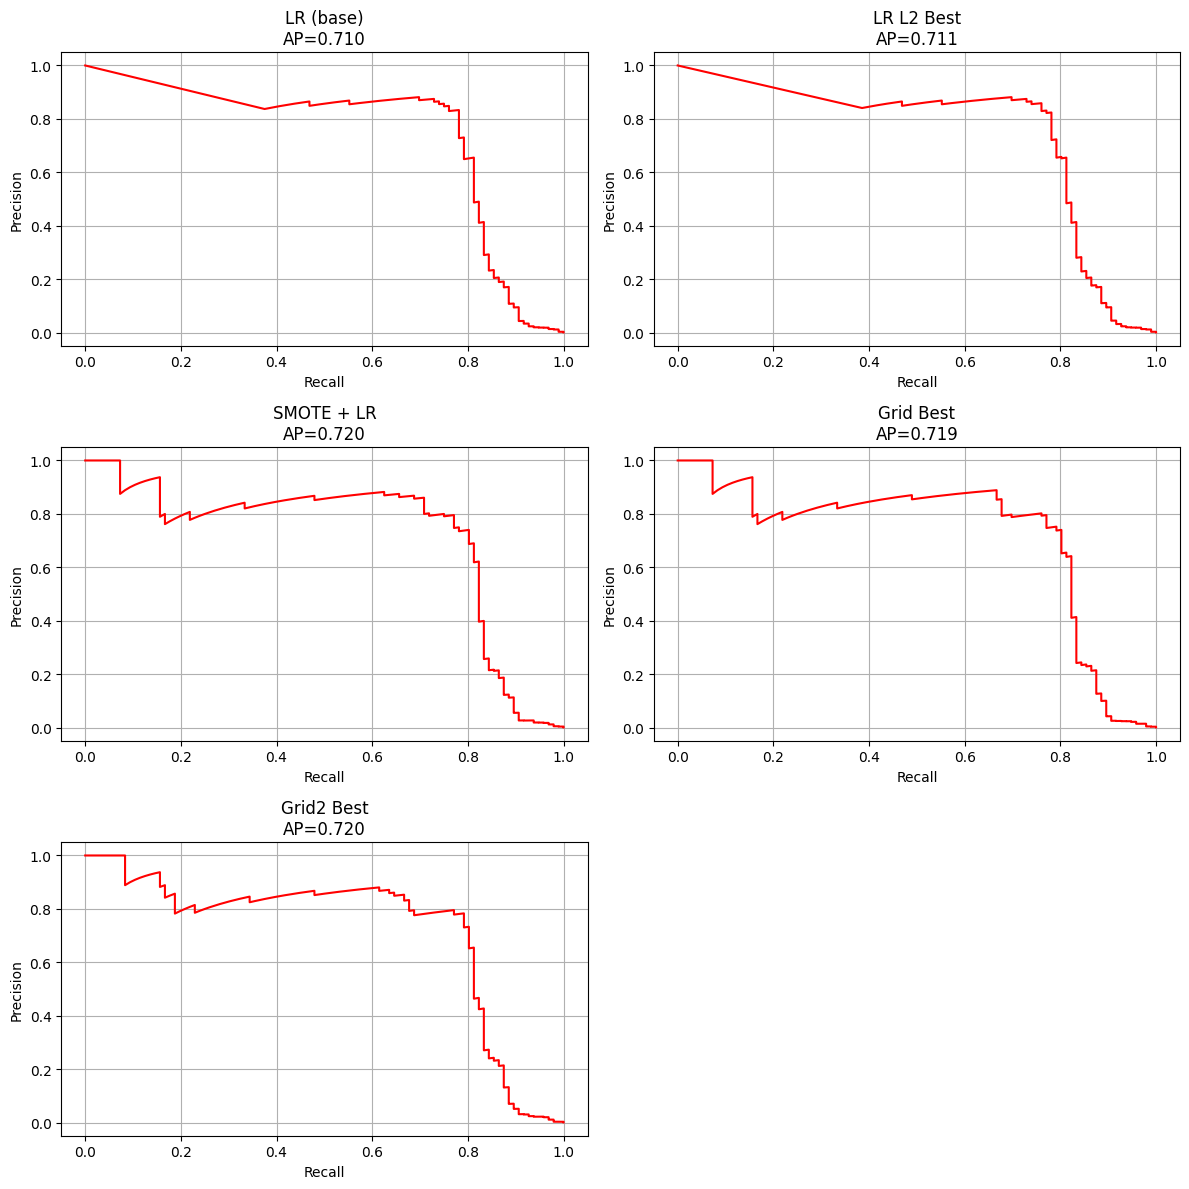

In [22]:

# unwrap helper
def unwrap(m):
    if hasattr(m, "best_estimator_"):
        return m.best_estimator_
    if isinstance(m, (tuple, list)):
        for it in m:
            if hasattr(it, "predict_proba"):
                return it
    return m

models = {
    "LR (base)": lr,
    "LR L2 Best": lr_l2_best,
    "SMOTE + LR": smote_lr,
    "Grid Best": best,
    "Grid2 Best": best2
}

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for ax, (name, m) in zip(axes, models.items()):
    est = unwrap(m)
    p_te = est.predict_proba(X_te)[:,1]
    prec, rec, _ = precision_recall_curve(y_te, p_te)
    ap = average_precision_score(y_te, p_te)
    ax.plot(rec, prec, color="red")
    ax.set_title(f"{name}\nAP={ap:.3f}")
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.grid(True)

# boş kalan hücreyi sil
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [49]:
# collect models that exist in the notebook
# candidates = ['lr_wo']
# models = {n: globals()[n] for n in candidates if n in globals()}

# def _score(m, X):
#     return (m.predict_proba(X)[:, 1] if hasattr(m, "predict_proba")
#             else m.decision_function(X))

# for name, m in models.items():
#     p_val = _score(m, Xval_wo)
#     p_te  = _score(m, Xte_wo)
#     ap_v  = average_precision_score(y_val, p_val)
#     ap_t  = average_precision_score(y_te,  p_te)

#     fig, axes = plt.subplots(1, 2, figsize=(10, 4))
#     PrecisionRecallDisplay.from_predictions(y_val, p_val, ax=axes[0])
#     axes[0].set_title(f"{name} — PR (VAL) | AP={ap_v:.4f}")
#     PrecisionRecallDisplay.from_predictions(y_te,  p_te,  ax=axes[1])
#     axes[1].set_title(f"{name} — PR (TEST) | AP={ap_t:.4f}")
#     plt.tight_layout(); plt.show()

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:


# Train/Test Dataset wrapper
train_ds = Dataset(X_tr, label=y_tr, cat_features=[])
test_ds  = Dataset(X_te, label=y_te, cat_features=[])

# Seçmek istediğin model (örnek: lr_l2_best)
chosen_model = lr_l2_best

# Run Deepchecks suite
suite = model_evaluation()
result = suite.run(train_ds, test_ds, chosen_model)

# Jupyter içinde göster
result.show()



<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

### Logistic Regression with Unbalanced Data Techniques

***i. Train-Test Split (Again)***

In [ ]:
# already class weight - smote - treshold applied.

In [23]:


# --- L1 (Lasso) LR pipeline ---
lasso_pipe = ImbPipeline(steps=[
    ('prep', prep_lr),  # RobustScaler on 'Amount', others passthrough
    ('clf', LogisticRegression(
        penalty='l1',
        solver='liblinear',        # L1 + class_weight için güvenli
        class_weight='balanced',
        max_iter=4000,
        random_state=42
    ))
])

# --- Grid: C değerleri (daha geniş istersen arttır) ---
param_grid = {
    'clf__C': [0.005, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_l1 = GridSearchCV(
    estimator=lasso_pipe,
    param_grid=param_grid,
    scoring='average_precision',   # PR-AUC
    cv=cv,
    n_jobs=-1,
    verbose=0
)

# Eğer groups_tr kullanıyorsan: grid_l1.fit(X_tr, y_tr, groups=groups_tr)
grid_l1.fit(X_tr, y_tr, groups=groups_tr)

l1_best = grid_l1.best_estimator_
print("Best params:", grid_l1.best_params_)
print("Best CV AP:", round(grid_l1.best_score_, 6))


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:877: UserWarning:

The groups parameter is ignored by StratifiedKFold



Best params: {'clf__C': 0.3}
Best CV AP: 0.747944


In [24]:


p_val = l1_best.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2*prec*rec/(prec+rec+1e-12)
t_l1 = float(thr[np.nanargmax(f1[:-1])])

scores_l1 = eval_metric(l1_best, X_tr, y_tr, X_te, y_te, thr=t_l1)
print("\nReturned dict:", scores_l1)

threshold: 1.0000

TEST
[[56521    15]
 [   21    75]]
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9997     56536
           1     0.8333    0.7812    0.8065        96

    accuracy                         0.9994     56632
   macro avg     0.9165    0.8905    0.9031     56632
weighted avg     0.9993    0.9994    0.9994     56632

TEST Average Precision (PR-AUC): 0.708839

TRAIN
[[169993     44]
 [    57    216]]
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997    170037
           1     0.8308    0.7912    0.8105       273

    accuracy                         0.9994    170310
   macro avg     0.9152    0.8955    0.9051    170310
weighted avg     0.9994    0.9994    0.9994    170310

TRAIN Average Precision (PR-AUC): 0.738592

Returned dict: {'thr': 0.9999837794526334, 'test_ap': 0.708838936265351, 'train_ap': 0.7385916668782307}


In [36]:
                                               # model comparison


def unwrap(m):
    if hasattr(m, "best_estimator_"):
        return m.best_estimator_
    if isinstance(m, (tuple, list)):
        for it in m:
            if hasattr(it, "predict_proba"):
                return it
    return m

def pick_val_threshold(y_true, p_prob):
    prec, rec, thr = precision_recall_curve(y_true, p_prob)
    f1 = 2*prec*rec/(prec+rec+1e-12)
    # Handling potential empty threshold array case (when no positive predictions)
    if len(thr) == 0:
        return 0.5 # Or some other default threshold
    return thr[np.nanargmax(f1[:-1])]

models = {
    "LR (base)": lr,
    "LR L2 Best": lr_l2_best,
    "SMOTE + LR": smote_lr,
    "Grid Best": best,
     "Grid2 Best": best2, # Removed as best2 is not defined
    "l1_best": l1_best,
    "calib_model": calib_model
}

rows = []
for name, m in models.items():
    est = unwrap(m)
    # Check if the model has predict_proba before calling pick_val_threshold
    if hasattr(est, 'predict_proba'):
      thr = pick_val_threshold(y_val, est.predict_proba(X_val)[:,1])

      p_te = est.predict_proba(X_te)[:,1]
      yhat = (p_te >= thr).astype(int)

      rows.append({
          "Model": name,
          "Thr": round(thr, 4),
          "Test_AP": round(average_precision_score(y_te, p_te), 4),
          "Prec": round(precision_score(y_te, yhat, zero_division=0), 4),
          "Recall": round(recall_score(y_te, yhat, zero_division=0), 4),
          "F1": round(f1_score(y_te, yhat, zero_division=0), 4)
      })
    else:
      # Handle models without predict_proba if necessary, or skip
      print(f"Skipping model {name} as it does not have predict_proba.")


pd.DataFrame(rows)

Model     Thr  Test_AP    Prec  Recall      F1
0    LR (base)  1.0000   0.7103  0.8315  0.7708  0.8000
1   LR L2 Best  1.0000   0.7115  0.8642  0.7292  0.7910
2   SMOTE + LR  0.9852   0.7201  0.7912  0.7500  0.7701
3    Grid Best  0.9721   0.7190  0.8000  0.7500  0.7742
4   Grid2 Best  0.7560   0.7201  0.7935  0.7604  0.7766
5      l1_best  1.0000   0.7088  0.8333  0.7812  0.8065
6  calib_model  0.3800   0.7002  0.8642  0.7292  0.7910

### Model Calibration Explanation

Model calibration is a process to adjust the predicted probabilities of a classification model so that they are more accurate and reliable.

Here's what it does for a model:

*   **Ensures Probabilities Reflect True Likelihoods:** Ideally, if a model predicts a probability of 0.8 for a certain class, it should be correct 80% of the time for instances with that predicted probability. Calibration aims to achieve this alignment between predicted probabilities and actual outcomes.
*   **Improves Trustworthiness:** Calibrated probabilities are more trustworthy. In applications like fraud detection, knowing the true likelihood of fraud is critical for downstream decisions (e.g., whether to flag a transaction for manual review).
*   **Benefits Downstream Tasks:** Many applications use the predicted probabilities directly (e.g., for ranking, setting thresholds, or combining with cost/benefit analysis). Using calibrated probabilities can lead to better performance in these downstream tasks.

**Why is it important in your fraud detection project?**

In imbalanced datasets, models can sometimes be overconfident or underconfident in their predictions, especially for the minority class. Calibration helps to correct these biases, making the probability scores more meaningful. This is particularly useful when you need to:

*   Set a risk-based threshold for flagging transactions.
*   Compare the outputs of different models.
*   Use the probabilities in a decision-making system.

Looking at the calibration plots generated in the notebook, you can see the difference:

*   **Before Calibration (RAW curve):** This curve shows the raw predicted probabilities against the true probability in each bin. Deviations from the ideal diagonal line indicate miscalibration (e.g., the model being overconfident or underconfident).
*   **After Calibration (CAL curve):** This curve shows the predicted probabilities after calibration. The goal is for this curve to be much closer to the ideal diagonal line, indicating that the calibrated probabilities are better aligned with the true likelihoods.

Calibration doesn't typically change the model's ability to rank instances (measured by metrics like ROC AUC), but it makes the probability *values* themselves more interpretable and reliable for decision-making based on risk.

Calibrating LR (base)...


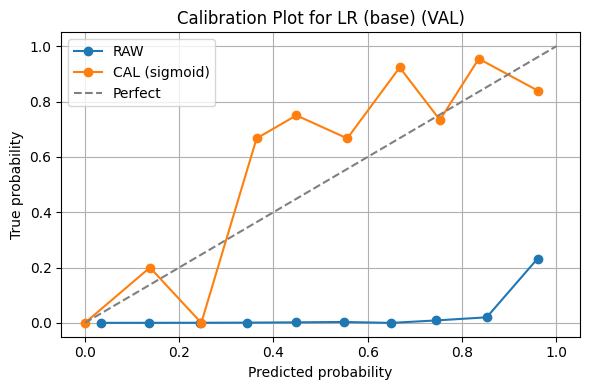

--------------------------------------------------
Calibrating LR L2 Best...


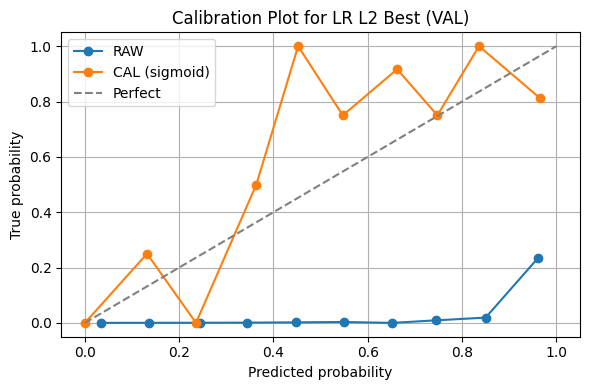

--------------------------------------------------
Calibrating SMOTE + LR...


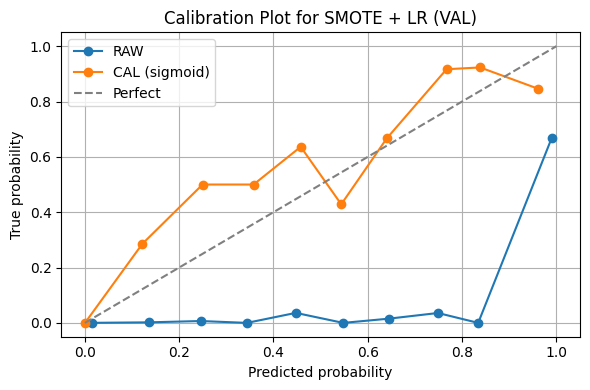

--------------------------------------------------
Calibrating Grid Best...


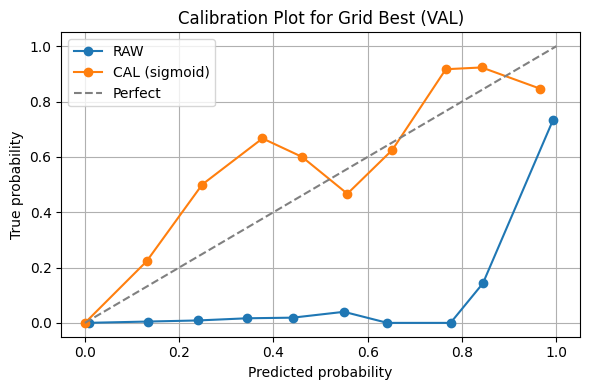

--------------------------------------------------
Calibrating l1_best...


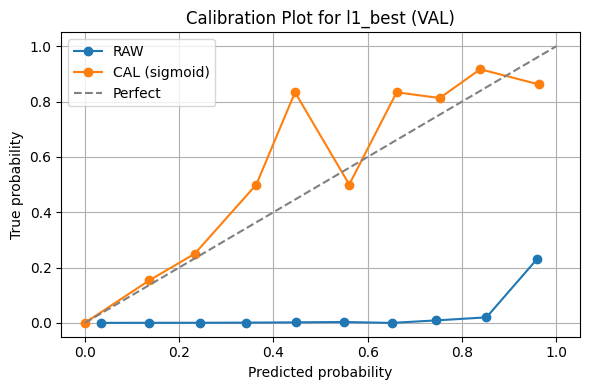

--------------------------------------------------


In [37]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt
import numpy as np

# Your list of models (excluding the already calibrated one)
models_to_calibrate = {
    "LR (base)": lr,
    "LR L2 Best": lr_l2_best,
    "SMOTE + LR": smote_lr,
    "Grid Best": best,
    # "Grid2 Best": best2, # Excluded as it caused NameError previously
    "l1_best": l1_best,
}

# Calibrate and plot for each model
for name, model in models_to_calibrate.items():
    print(f"Calibrating {name}...")
    # Fit calibrated wrapper (Platt / sigmoid)
    # Use prefit=False as we are fitting the base model within the CalibratedClassifierCV
    calibrated_model = CalibratedClassifierCV(estimator=model, method='sigmoid', cv=5)
    calibrated_model.fit(X_tr, y_tr)

    # Predict probabilities on the validation set
    proba_raw_val = model.predict_proba(X_val)[:, 1]
    proba_cal_val = calibrated_model.predict_proba(X_val)[:, 1]

    # Calibration plot (VAL) — RAW vs CAL
    pt_r, pp_r = calibration_curve(y_val, proba_raw_val, n_bins=10, strategy='uniform')
    pt_c, pp_c = calibration_curve(y_val, proba_cal_val, n_bins=10, strategy='uniform')

    plt.figure(figsize=(6, 4))
    plt.plot(pp_r, pt_r, marker='o', label='RAW')
    plt.plot(pp_c, pt_c, marker='o', label='CAL (sigmoid)')
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfect')
    plt.xlabel("Predicted probability")
    plt.ylabel("True probability")
    plt.title(f"Calibration Plot for {name} (VAL)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("-" * 50) # Separator for clarity

By default, this threshold is often set to 0.5. However, in imbalanced datasets, where the positive class is rare, using a default threshold of 0.5 can lead to a high number of false negatives (missing fraudulent transactions).

Adjusting the threshold allows you to balance the trade-off between precision and recall. For example, lowering the threshold might increase recall (detecting more frauds) but decrease precision (also flagging more legitimate transactions as fraud). Conversely, raising the threshold increases precision but decreases recall.

***ii. Model Training***

***Prediction and Model Evaluating and Tuning***

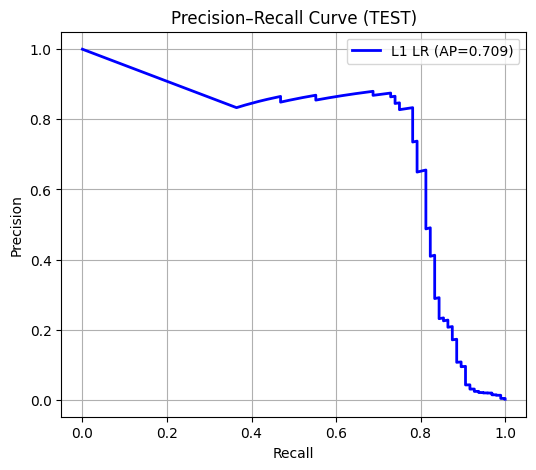

In [ ]:


# Olasılıklar (TEST seti)
p_te = l1_best.predict_proba(X_te)[:, 1]   # senin L1 en iyi model değişkenin

# PR curve
prec, rec, thr = precision_recall_curve(y_te, p_te)
ap = average_precision_score(y_te, p_te)

plt.figure(figsize=(6,5))
plt.plot(rec, prec, color="blue", lw=2, label=f"L1 LR (AP={ap:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (TEST)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:

# Data integrity
# res_int = data_integrity().run(train_ds, test_ds)
# res_int.show()

# Model evaluation (senin l1_best modelini ver)
res_eval = model_evaluation().run(train_ds, test_ds, model=l1_best)
res_eval.show()

***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

In [27]:
# --- 1) Fit calibrated wrapper (Platt) ---


calib_model = CalibratedClassifierCV(l1_best, method='sigmoid', cv=5)
calib_model.fit(X_tr, y_tr)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




CalibratedClassifierCV(cv=5,
                       estimator=Pipeline(steps=[('prep',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('amt',
                                                                                   RobustScaler(),
                                                                                   ['Amount'])])),
                                                 ('clf',
                                                  LogisticRegression(C=0.3,
                                                                     class_weight='balanced',
                                                                     max_iter=4000,
                                                                     penalty='l1',
                                                                     random_state=42,
                                                                     solver='liblinear'))]))

In [28]:
# --- 2) Probas (VAL) ---
proba_raw_val = l1_best.predict_proba(X_val)[:, 1]
proba_cal_val = calib_model.predict_proba(X_val)[:, 1]


In [29]:
print("Brier:", brier_score_loss(y_val, proba_cal_val))


Brier: 0.0006982198475362083


In [30]:

# --- 3) Kısa özet (VAL) ---
p = y_val.mean()
bs_ref = p * (1 - p)

def summarize(name, y, p_hat):
    bs  = brier_score_loss(y, p_hat)
    bss = 1 - (bs / bs_ref)
    print(f"{name:>3} | mean={p_hat.mean():.6f}  AP={average_precision_score(y,p_hat):.6f}  "
          f"ROC={roc_auc_score(y,p_hat):.6f}  BS={bs:.6f}  BSS={bss:.3f}")

summarize("RAW", y_val, proba_raw_val)
summarize("CAL", y_val, proba_cal_val)

RAW | mean=0.079305  AP=0.691558  ROC=0.952315  BS=0.022160  BSS=-11.122
CAL | mean=0.001769  AP=0.704397  ROC=0.947930  BS=0.000698  BSS=0.618


In [31]:

# --- 4) En iyi eşik (VAL, calibrated) ---
prec, rec, thr = precision_recall_curve(y_val, proba_cal_val)
f1 = 2 * prec * rec / (prec + rec + 1e-12)
best_ix  = np.nanargmax(f1)
best_thr = thr[max(best_ix - 1, 0)]
print("best_thr (cal) =", float(best_thr))

best_thr (cal) = 0.3473027057600869


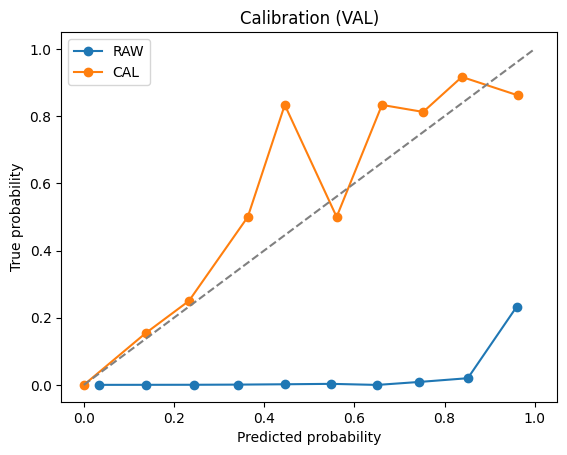

In [32]:
# --- 5) Calibration plot (RAW vs CAL) ---
pt_r, pp_r = calibration_curve(y_val, proba_raw_val, n_bins=10)
pt_c, pp_c = calibration_curve(y_val, proba_cal_val, n_bins=10)
plt.plot(pp_r, pt_r, marker='o', label='RAW')
plt.plot(pp_c, pt_c, marker='o', label='CAL')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel("Predicted probability"); plt.ylabel("True probability"); plt.title("Calibration (VAL)")
plt.legend(); plt.show()


In [33]:
# --- 6) Test Brier (CAL) ---
proba_cal_test = calib_model.predict_proba(X_te)[:, 1]
print("Test Brier (CAL):", brier_score_loss(y_te, proba_cal_test))

Test Brier (CAL): 0.000635799432688369


In [38]:
# --- 7) Save model + threshold ---
joblib.dump(calib_model, "l1_calibrated_sigmoid.joblib")
with open("l1_calibrated_threshold.json", "w") as f:
    json.dump({"threshold": float(best_thr)}, f)

In [ ]:
print(calib_model)

CalibratedClassifierCV(cv=5,
                       estimator=Pipeline(steps=[('prep',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('amt',
                                                                                   RobustScaler(),
                                                                                   ['Amount'])])),
                                                 ('clf',
                                                  LogisticRegression(C=0.3,
                                                                     class_weight='balanced',
                                                                     max_iter=4000,
                                                                     penalty='l1',
                                                                     random_state=42,
                                                    

In [39]:
eval_metric(calib_model, X_tr, y_tr, X_te, y_te, thr=best_thr)

# calibrated probabilities via predict_proba

threshold: 0.3473

TEST
[[56525    11]
 [   26    70]]
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9997     56536
           1     0.8642    0.7292    0.7910        96

    accuracy                         0.9993     56632
   macro avg     0.9319    0.8645    0.8953     56632
weighted avg     0.9993    0.9993    0.9993     56632

TEST Average Precision (PR-AUC): 0.700247

TRAIN
[[170007     30]
 [    64    209]]
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997    170037
           1     0.8745    0.7656    0.8164       273

    accuracy                         0.9994    170310
   macro avg     0.9371    0.8827    0.9081    170310
weighted avg     0.9994    0.9994    0.9994    170310

TRAIN Average Precision (PR-AUC): 0.75385


{'thr': 0.3473027057600869,
 'test_ap': 0.7002474394251426,
 'train_ap': 0.7538500085130726}

In [ ]:
eval_metric(calib_model, X_tr, y_tr, X_te, y_te, thr=None)

# predict at the default 0.5 threshold,


## Random Forest Classifier with Unbalanced Data Techniques:





   

## Random Forest:

Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions. It's known for its robustness and ability to handle complex datasets.

**How it Works (General Overview):**

1.  **Bagging (Bootstrap Aggregating):** The algorithm creates several subsets of the training data by randomly sampling with replacement. Each subset is used to train a separate decision tree. This reduces variance and helps prevent overfitting.
2.  **Random Feature Subsets:** At each split in a decision tree, only a random subset of features is considered. This decorrelates the trees and further improves the ensemble's robustness.
3.  **Ensemble Prediction:** For classification, the final prediction is typically the majority vote of the individual trees' predictions.

**Important Parameters:**

*   **`n_estimators`:** The number of trees in the forest. More trees generally improve performance but increase computation time.
*   **`max_depth`:** The maximum depth of each tree. Limits tree growth to prevent overfitting.
*   **`min_samples_split`:** Minimum samples required to split an internal node. Higher values regularize the model.
*   **`min_samples_leaf`:** Minimum samples required in a leaf node. Higher values lead to simpler trees.
*   **`max_features`:** The number of features considered at each split. Controls the randomness of feature selection. Common values: `"sqrt"`, `"log2"`, or a fraction.
*   **`max_samples`:** The number of samples drawn from the training data to train each tree (when `bootstrap=True`). A fraction between 0.0 and 1.0.
*   **`class_weight`:** Important for imbalanced data. `"balanced"` or `"balanced_subsample"` adjust weights to give more importance to the minority class.
*   **`ccp_alpha`:** Pruning parameter. Higher values increase pruning, simplifying the tree.

In [ ]:
# # Pearson korelasyon matrisi
# corr = df.corr(method="pearson")

# plt.figure(figsize=(30, 16))
# sns.heatmap(
#     corr,
#     cmap="coolwarm",      # renk paleti (kırmızı-mavi)
#     annot=True,          # sayıları da yazmak istersen True yap
#     fmt=".2f",
#     linewidths=0.5,
#     cbar_kws={"shrink": .8}
# )
# plt.title("Correlation Heatmap (Pearson)", fontsize=14)
# plt.show()

***i. Model Training***

In [ ]:


# 1) Class-weighted RandomForest (fast, strong baseline)
rf_weighted = RandomForestClassifier(
    n_estimators=600,
    max_depth=None,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
rf_weighted.fit(X_tr, y_tr)

# 2) Balanced Random Forest (per-tree balanced bootstrap)
brf = BalancedRandomForestClassifier(
    n_estimators=600,
    max_depth=None,
    min_samples_leaf=2,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)
brf.fit(X_tr, y_tr)

# 3) SMOTE + RandomForest (oversampling only on train via pipeline)
rf_smote = ImbPipeline(steps=[
    ('smote', SMOTE(sampling_strategy=0.2, k_neighbors=5, random_state=42)),
    ('rf', RandomForestClassifier(
        n_estimators=600,
        max_depth=None,
        min_samples_leaf=2,
        max_features='sqrt',
        n_jobs=-1,
        random_state=42
    ))
])
rf_smote.fit(X_tr, y_tr)

# Trained models ready for later evaluation:
#   rf_weighted, brf, rf_smote


Pipeline(steps=[('smote', SMOTE(random_state=42, sampling_strategy=0.2)),
                ('rf',
                 RandomForestClassifier(min_samples_leaf=2, n_estimators=600,
                                        n_jobs=-1, random_state=42))])

***ii. Prediction and Model Evaluating and Tuning***

In [ ]:

def maxf1_thr(y_true, p_prob):
    prec, rec, thr = precision_recall_curve(y_true, p_prob)
    f1 = 2*prec*rec/(prec+rec+1e-12)
    return float(thr[np.nanargmax(f1[:-1])])  # thr len = len(prec)-1

models = {
    "RF_weighted": rf_weighted,
    "BRF": brf,
    "RF_SMOTE": rf_smote
}

rf_scores = {}
for name, mdl in models.items():
    p_val = mdl.predict_proba(X_val)[:, 1]
    t = maxf1_thr(y_val, p_val)
    rf_scores[name] = eval_metric(mdl, X_tr, y_tr, X_te, y_te, thr=t)

rf_scores  # kısa özet dict

threshold: 0.3131

TEST
[[56528     8]
 [   20    76]]
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56536
           1     0.9048    0.7917    0.8444        96

    accuracy                         0.9995     56632
   macro avg     0.9522    0.8958    0.9221     56632
weighted avg     0.9995    0.9995    0.9995     56632

TEST Average Precision (PR-AUC): 0.833903

TRAIN
[[170024     13]
 [     0    273]]
              precision    recall  f1-score   support

           0     1.0000    0.9999    1.0000    170037
           1     0.9545    1.0000    0.9767       273

    accuracy                         0.9999    170310
   macro avg     0.9773    1.0000    0.9884    170310
weighted avg     0.9999    0.9999    0.9999    170310

TRAIN Average Precision (PR-AUC): 0.99791
threshold: 0.9113

TEST
[[56518    18]
 [   23    73]]
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9996     56536
 

{'RF_weighted': {'thr': 0.31311095047992865,
  'test_ap': 0.8339028928709953,
  'train_ap': 0.9979104131856136},
 'BRF': {'thr': 0.9113333333333334,
  'test_ap': 0.7408491034198786,
  'train_ap': 0.859108828988032},
 'RF_SMOTE': {'thr': 0.7432777777777776,
  'test_ap': 0.8477849730775769,
  'train_ap': 0.9999999999999999}}

In [ ]:
# === Grid Search: Class-Weighted Random Forest (rf_weighted) ===


# ---- Why these matter (short):
# n_estimators: more trees ↓variance (to a point), but longer training.
# max_depth: cap tree depth to prevent memorising (lower = more regularisation).
# min_samples_leaf / min_samples_split: force leaves/splits to have enough samples (↓overfit).
# max_features: fewer features per split ↑diversity, ↓overfit ('sqrt' or a fraction).
# max_samples: sub-sample rows per tree (0.5–0.8) to reduce correlation/variance.
# class_weight: 'balanced' reweights minority class by prevalence (must for imbalance).
# ccp_alpha: post-pruning; small > 0 adds gentle complexity penalty.


pipe_rf = Pipeline(steps=[
    ('prep', prep_lr),  # your ColumnTransformer that scales only Amount
    ('clf', RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42))
])

# Focused grid to reduce overfit (kept small on purpose)
param_grid = {
    # ↓ variance without going huge
    'clf__n_estimators': [300, 500],
    # cap tree growth
    'clf__max_depth': [8, 12],
    # make leaves big; strong regularisation lever
    'clf__min_samples_leaf': [40, 80],
    # require more samples to split; pairs well with big leaves
    'clf__min_samples_split': [120, 240],
    # fewer features per split → less correlation between trees
    'clf__max_features': ['sqrt', 0.4],
    # sub-sample rows per tree to decorrelate and regularise
    'clf__max_samples': [0.5],
    # gentle post-pruning
    'clf__ccp_alpha': [0.0, 1e-4],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # 3-fold = faster

gs_rf_weighted = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid,
    scoring='average_precision',   # PR-AUC
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True
)
gs_rf_weighted.fit(X_tr, y_tr)

best_rf_weighted = gs_rf_weighted.best_estimator_
print("Best params:", gs_rf_weighted.best_params_)
print("Best CV AP:", gs_rf_weighted.best_score_)



Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best params: {'clf__ccp_alpha': 0.0, 'clf__max_depth': 8, 'clf__max_features': 0.4, 'clf__max_samples': 0.5, 'clf__min_samples_leaf': 40, 'clf__min_samples_split': 240, 'clf__n_estimators': 300}
Best CV AP: 0.7328614123787656


In [ ]:
# --- VAL → threshold (max-F1), then TEST eval with your helper ---

def maxf1_thr(y_true, p_prob):
    prec, rec, thr = precision_recall_curve(y_true, p_prob)
    f1 = 2*prec*rec/(prec+rec+1e-12)
    return float(thr[np.nanargmax(f1[:-1])])

p_val = best_rf_weighted.predict_proba(X_val)[:,1]
thr_rf = maxf1_thr(y_val, p_val)

scores_rf = eval_metric(best_rf_weighted, X_tr, y_tr, X_te, y_te, thr=thr_rf)
print(scores_rf)


threshold: 0.8116

TEST
[[56523    13]
 [   24    72]]
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56536
           1     0.8471    0.7500    0.7956        96

    accuracy                         0.9993     56632
   macro avg     0.9233    0.8749    0.8976     56632
weighted avg     0.9993    0.9993    0.9993     56632

TEST Average Precision (PR-AUC): 0.657119

TRAIN
[[170008     29]
 [    51    222]]
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998    170037
           1     0.8845    0.8132    0.8473       273

    accuracy                         0.9995    170310
   macro avg     0.9421    0.9065    0.9235    170310
weighted avg     0.9995    0.9995    0.9995    170310

TRAIN Average Precision (PR-AUC): 0.79366
{'thr': 0.8116014489495313, 'test_ap': 0.6571186090116382, 'train_ap': 0.7936596107690107}


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

pipe_rf = Pipeline(steps=[
    ('prep', prep_lr),
    ('clf', RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42))
])

param_grid_local = {
    'clf__n_estimators': [300, 500],       # modest bump for stability
    'clf__max_depth': [10, 12],            # relax depth a bit
    'clf__min_samples_leaf': [20, 30],     # smaller leaves
    'clf__min_samples_split': [80, 120],   # easier to split
    'clf__max_features': ['sqrt', 0.5],    # slightly more features at split
    'clf__max_samples': [0.6, 0.7],        # more rows per tree than 0.5
    'clf__ccp_alpha': [0.0],               # pruning off
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
gs_local = GridSearchCV(
    pipe_rf, param_grid_local,
    scoring='average_precision', cv=cv, n_jobs=-1, verbose=1, refit=True
)
gs_local.fit(X_tr, y_tr)

best_rf_local = gs_local.best_estimator_
print("Best params (local):", gs_local.best_params_)
print("Best CV AP (local):", gs_local.best_score_)

# Evaluate with your VAL→TEST routine
p_val = best_rf_local.predict_proba(X_val)[:,1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2*prec*rec/(prec+rec+1e-12)
thr_rf = float(thr[np.nanargmax(f1[:-1])])

scores_rf_local = eval_metric(best_rf_local, X_tr, y_tr, X_te, y_te, thr=thr_rf)
print(scores_rf_local)


Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best params (local): {'clf__ccp_alpha': 0.0, 'clf__max_depth': 12, 'clf__max_features': 0.5, 'clf__max_samples': 0.7, 'clf__min_samples_leaf': 20, 'clf__min_samples_split': 80, 'clf__n_estimators': 300}
Best CV AP (local): 0.7920406116252486
threshold: 0.7956

TEST
[[56523    13]
 [   23    73]]
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56536
           1     0.8488    0.7604    0.8022        96

    accuracy                         0.9994     56632
   macro avg     0.9242    0.8801    0.9009     56632
weighted avg     0.9993    0.9994    0.9993     56632

TEST Average Precision (PR-AUC): 0.781742

TRAIN
[[170009     28]
 [    50    223]]
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998    170037
           1     0.8884    0.8168    0.8511       273

    accuracy                         0.9995    170310
   macro avg

In [ ]:
pipe_rf = Pipeline(steps=[
    ('prep', prep_lr),
    ('clf', RandomForestClassifier(n_jobs=-1, random_state=42))
])

param_grid_tiny = {
    # keep your best neighbourhood, just 2–3 nudges
    'clf__n_estimators': [300, 500],      # a few more trees for stability
    'clf__max_depth': [12],               # keep best
    'clf__min_samples_leaf': [20],        # keep best
    'clf__min_samples_split': [80],       # keep best
    'clf__max_features': [0.5, 'sqrt'],   # try sqrt
    'clf__max_samples': [0.7],            # keep best
    'clf__ccp_alpha': [0.0],              # keep best
    'clf__class_weight': ['balanced', 'balanced_subsample'],  # NEW
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
gs_tiny = GridSearchCV(pipe_rf, param_grid_tiny, scoring='average_precision',
                       cv=cv, n_jobs=-1, verbose=1, refit=True)
gs_tiny.fit(X_tr, y_tr)

best_rf_tiny = gs_tiny.best_estimator_
print("Best params (tiny):", gs_tiny.best_params_)
print("Best CV AP (tiny):", gs_tiny.best_score_)

# VAL→thr (max-F1) → TEST eval
p_val = best_rf_tiny.predict_proba(X_val)[:,1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2*prec*rec/(prec+rec+1e-12)
thr_tiny = float(thr[np.nanargmax(f1[:-1])])

scores_rf_tiny = eval_metric(best_rf_tiny, X_tr, y_tr, X_te, y_te, thr=thr_tiny)
print(scores_rf_tiny)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best params (tiny): {'clf__ccp_alpha': 0.0, 'clf__class_weight': 'balanced_subsample', 'clf__max_depth': 12, 'clf__max_features': 0.5, 'clf__max_samples': 0.7, 'clf__min_samples_leaf': 20, 'clf__min_samples_split': 80, 'clf__n_estimators': 500}
Best CV AP (tiny): 0.7929392367476114
threshold: 0.7623

TEST
[[56522    14]
 [   22    74]]
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56536
           1     0.8409    0.7708    0.8043        96

    accuracy                         0.9994     56632
   macro avg     0.9203    0.8853    0.9020     56632
weighted avg     0.9993    0.9994    0.9994     56632

TEST Average Precision (PR-AUC): 0.779759

TRAIN
[[170009     28]
 [    49    224]]
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998    170037
           1     0.8889    0.8205    0.8533       273

    accuracy               

***iii. Plot Precision and Recall Curve***


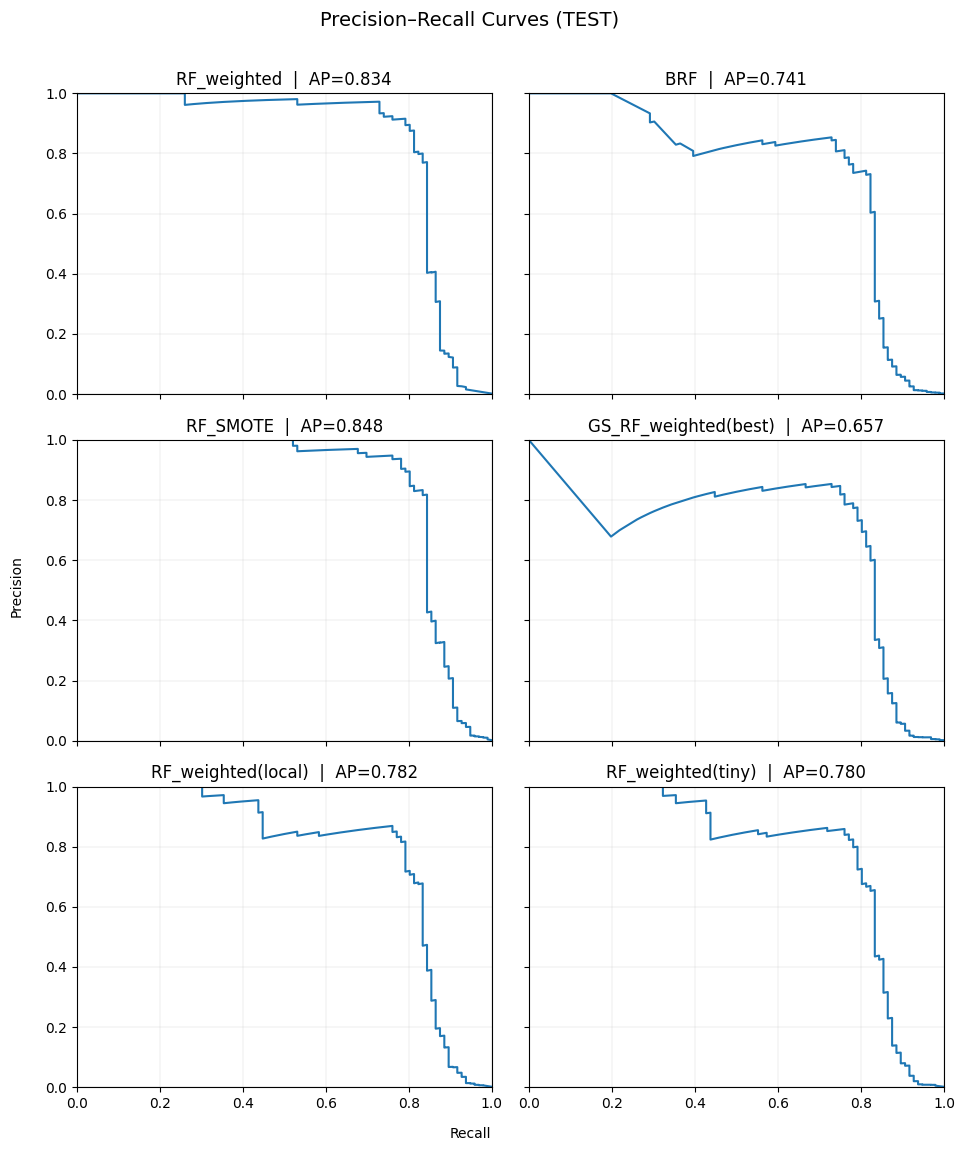

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

def _as_estimator(m):
    # Use best_estimator_ if it's a GridSearchCV; otherwise use the model itself
    return getattr(m, "best_estimator_", m)

models = {
    "RF_weighted": rf_weighted,
    "BRF": brf,
    "RF_SMOTE": rf_smote,
    "GS_RF_weighted(best)": gs_rf_weighted,  # will use best_estimator_
    "RF_weighted(local)": best_rf_local,
    "RF_weighted(tiny)": best_rf_tiny,
}

fig, axes = plt.subplots(3, 2, figsize=(10, 12), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (name, mdl) in zip(axes, models.items()):
    est = _as_estimator(mdl)
    # Get TEST probabilities
    p_te = est.predict_proba(X_te)[:, 1]
    prec, rec, _ = precision_recall_curve(y_te, p_te)
    ap = average_precision_score(y_te, p_te)
    ax.plot(rec, prec)
    ax.set_title(f"{name}  |  AP={ap:.3f}")
    ax.grid(True, linewidth=0.3, alpha=0.5)

for ax in axes:
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

fig.suptitle("Precision–Recall Curves (TEST)", fontsize=14)
fig.text(0.5, 0.04, "Recall", ha="center")
fig.text(0.04, 0.5, "Precision", va="center", rotation="vertical")
plt.tight_layout(rect=[0.06, 0.05, 1, 0.97])
plt.show()


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score

def _unwrap(m):  # use best_estimator_ if GridSearchCV, else the model itself
    return getattr(m, "best_estimator_", m)

def _maxf1_threshold(y_true, p_prob):
    prec, rec, thr = precision_recall_curve(y_true, p_prob)
    f1 = 2*prec*rec/(prec+rec+1e-12)
    j = np.nanargmax(f1[:-1])  # last prec/rec point has no threshold
    return float(thr[j])

models = {
    "RF_weighted": rf_weighted,
    "BRF": brf,
    "RF_SMOTE": rf_smote,
    "GS_RF_weighted": gs_rf_weighted,      # GridSearchCV -> unwrap
    "RF_weighted(local)": best_rf_local,
    "RF_weighted(tiny)": best_rf_tiny,
}

rows = []
for name, m in models.items():
    est = _unwrap(m)
    # --- threshold on VAL by max-F1 ---
    p_val = est.predict_proba(X_val)[:, 1]
    thr = _maxf1_threshold(y_val, p_val)

    # --- call your eval_metric (prints confusion/report + APs) ---
    res = eval_metric(est, X_tr, y_tr, X_te, y_te, thr=thr)

    # --- also compute TEST P/R/F1 for the table ---
    p_te = est.predict_proba(X_te)[:, 1]
    yhat_te = (p_te >= thr).astype(int)
    rows.append({
        "Model": name,
        "Thr": round(thr, 4),
        "TEST_AP": round(res["test_ap"], 3),
        "TRAIN_AP": round(res["train_ap"], 3),
        "TEST_P": round(precision_score(y_te, yhat_te), 3),
        "TEST_R": round(recall_score(y_te, yhat_te), 3),
        "TEST_F1": round(f1_score(y_te, yhat_te), 3),
    })

df_scores = pd.DataFrame(rows).sort_values("TEST_AP", ascending=False).reset_index(drop=True)
df_scores


threshold: 0.3131

TEST
[[56528     8]
 [   20    76]]
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56536
           1     0.9048    0.7917    0.8444        96

    accuracy                         0.9995     56632
   macro avg     0.9522    0.8958    0.9221     56632
weighted avg     0.9995    0.9995    0.9995     56632

TEST Average Precision (PR-AUC): 0.833903

TRAIN
[[170024     13]
 [     0    273]]
              precision    recall  f1-score   support

           0     1.0000    0.9999    1.0000    170037
           1     0.9545    1.0000    0.9767       273

    accuracy                         0.9999    170310
   macro avg     0.9773    1.0000    0.9884    170310
weighted avg     0.9999    0.9999    0.9999    170310

TRAIN Average Precision (PR-AUC): 0.99791
threshold: 0.9113

TEST
[[56518    18]
 [   23    73]]
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9996     56536
 

Model          Thr      TEST_AP     TRAIN_AP       TEST_P  \
0            RF_SMOTE 0.7433000000 0.8480000000 1.0000000000 0.9480000000   
1         RF_weighted 0.3131000000 0.8340000000 0.9980000000 0.9050000000   
2  RF_weighted(local) 0.7956000000 0.7820000000 0.9230000000 0.8490000000   
3   RF_weighted(tiny) 0.7623000000 0.7800000000 0.9180000000 0.8410000000   
4                 BRF 0.9113000000 0.7410000000 0.8590000000 0.8020000000   
5      GS_RF_weighted 0.8116000000 0.6570000000 0.7940000000 0.8470000000   

        TEST_R      TEST_F1  
0 0.7600000000 0.8440000000  
1 0.7920000000 0.8440000000  
2 0.7600000000 0.8020000000  
3 0.7710000000 0.8040000000  
4 0.7600000000 0.7810000000  
5 0.7500000000 0.7960000000

***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

Brier (VAL, sigmoid-cal): 0.0006052675696470322
RAW | mean=0.006565  AP=0.787026  ROC=0.973429  BS=0.000953  BSS=0.479
CAL | mean=0.001838  AP=0.755286  ROC=0.978151  BS=0.000605  BSS=0.669
best_thr (cal-sigmoid) = 0.6084726064187228


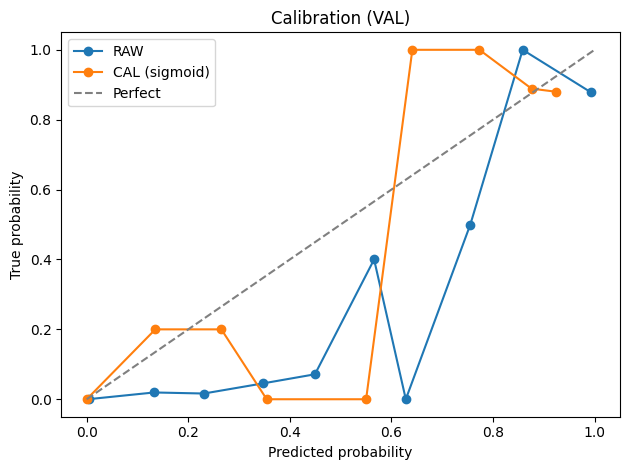

threshold: 0.6085

TEST
[[56522    14]
 [   22    74]]
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56536
           1     0.8409    0.7708    0.8043        96

    accuracy                         0.9994     56632
   macro avg     0.9203    0.8853    0.9020     56632
weighted avg     0.9993    0.9994    0.9994     56632

TEST Average Precision (PR-AUC): 0.745823

TRAIN
[[170009     28]
 [    52    221]]
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998    170037
           1     0.8876    0.8095    0.8467       273

    accuracy                         0.9995    170310
   macro avg     0.9436    0.9047    0.9233    170310
weighted avg     0.9995    0.9995    0.9995    170310

TRAIN Average Precision (PR-AUC): 0.887913
Calibrated (sigmoid) scores: {'thr': 0.6084726064187228, 'test_ap': 0.7458226422663772, 'train_ap': 0.8879131253217853}
TEST AP (calibrated, sigmoid): 0.745823


In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# --- 1) Fit calibrated wrapper (Platt / sigmoid) ---
calib_sig = CalibratedClassifierCV(
    estimator=best_rf_local,   # tuned RF pipeline
    method='sigmoid',
    cv=5
)
calib_sig.fit(X_tr, y_tr)

# --- 2) Probas (VAL): RAW vs CAL ---
proba_raw_val = best_rf_local.predict_proba(X_val)[:, 1]
proba_cal_val = calib_sig.predict_proba(X_val)[:, 1]

print("Brier (VAL, sigmoid-cal):", brier_score_loss(y_val, proba_cal_val))

# --- 3) Kısa özet (VAL) ---
p = y_val.mean()
bs_ref = p * (1 - p)

def summarize(name, y, p_hat):
    bs  = brier_score_loss(y, p_hat)
    bss = 1 - (bs / bs_ref)
    print(f"{name:>3} | mean={p_hat.mean():.6f}  AP={average_precision_score(y,p_hat):.6f}  "
          f"ROC={roc_auc_score(y,p_hat):.6f}  BS={bs:.6f}  BSS={bss:.3f}")

summarize("RAW", y_val, proba_raw_val)
summarize("CAL", y_val, proba_cal_val)

# --- 4) En iyi eşik (VAL, calibrated) ---
prec, rec, thr = precision_recall_curve(y_val, proba_cal_val)
f1 = 2 * prec * rec / (prec + rec + 1e-12)
best_ix  = np.nanargmax(f1[:-1])  # son noktanın threshold'u yok
best_thr = float(thr[best_ix])
print("best_thr (cal-sigmoid) =", best_thr)

# --- 5) Calibration plot (VAL) — RAW vs CAL ---
pt_r, pp_r = calibration_curve(y_val, proba_raw_val, n_bins=10, strategy='uniform')
pt_c, pp_c = calibration_curve(y_val, proba_cal_val, n_bins=10, strategy='uniform')

plt.figure()
plt.plot(pp_r, pt_r, marker='o', label='RAW')
plt.plot(pp_c, pt_c, marker='o', label='CAL (sigmoid)')
plt.plot([0,1], [0,1], '--', color='gray', label='Perfect')
plt.xlabel("Predicted probability"); plt.ylabel("True probability"); plt.title("Calibration (VAL)")
plt.legend(); plt.tight_layout(); plt.show()

# --- 6) TEST değerlendirme (kalibre model + VAL'den seçilen eşik) ---
scores_cal_sig = eval_metric(calib_sig, X_tr, y_tr, X_te, y_te, thr=best_thr)
print("Calibrated (sigmoid) scores:", scores_cal_sig)

# (Opsiyonel) PR-AUC (TEST) kalibre edilmiş olasılıkla
p_te_cal = calib_sig.predict_proba(X_te)[:, 1]
print("TEST AP (calibrated, sigmoid):", round(average_precision_score(y_te, p_te_cal), 6))



### XGBoost Classifier with Unbalanced Data Techniques

***i. Model Training***

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 MB 12.6 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
print(xgb.__version__)

3.0.5


In [ ]:
from xgboost import XGBClassifier

# Basit XGBoost model (CPU için)
xgb = XGBClassifier(
    objective="binary:logistic",  # ikili sınıflandırma
    tree_method="hist",           # CPU histogram algoritması
    eval_metric="aucpr",          # imbalanced data için mantıklı metric
    random_state=42,
    n_jobs=-1
)

# Eğit
xgb.fit(X_tr, y_tr)

# Tahmin
p_te = xgb.predict_proba(X_te)[:, 1]
y_pred = xgb.predict(X_te)


# Validation tahmin olasılıkları
p_val = xgb.predict_proba(X_val)[:, 1]

# Precision-Recall eğrisi
prec, rec, thr = precision_recall_curve(y_val, p_val)

# F1 max (örnek olarak)
f1 = 2 * prec * rec / (prec + rec + 1e-9)
best_idx = f1.argmax()
best_thr = thr[best_idx]

print("Best threshold:", best_thr)
print("F1:", f1[best_idx], "Precision:", prec[best_idx], "Recall:", rec[best_idx])


Best threshold: 0.34314266
F1: 0.7772020720418803 Precision: 0.8426966292134831 Recall: 0.7211538461538461


In [ ]:
eval_metric(xgb, X_tr, y_tr, X_te, y_te, thr=best_thr)

threshold: 0.3431

TEST
[[56524    12]
 [   26    70]]
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9997     56536
           1     0.8537    0.7292    0.7865        96

    accuracy                         0.9993     56632
   macro avg     0.9266    0.8645    0.8931     56632
weighted avg     0.9993    0.9993    0.9993     56632

TEST Average Precision (PR-AUC): 0.765347

TRAIN
[[170036      1]
 [     2    271]]
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    170037
           1     0.9963    0.9927    0.9945       273

    accuracy                         1.0000    170310
   macro avg     0.9982    0.9963    0.9972    170310
weighted avg     1.0000    1.0000    1.0000    170310

TRAIN Average Precision (PR-AUC): 0.992686


{'thr': 0.34314266,
 'test_ap': 0.7653467941910007,
 'train_ap': 0.9926859272385388}

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# class imbalance weight
spw = (y_tr == 0).sum() / (y_tr == 1).sum()

pipe_xgb = Pipeline(steps=[
    ('prep', prep_lr),  # scales only Amount
    ('clf', XGBClassifier(
        objective='binary:logistic',
        eval_metric='aucpr',
        tree_method='hist',
        n_jobs=-1,
        random_state=42,
        scale_pos_weight=spw
    ))
])

# ~~ 384 candidates (trimmed) ~~
param_grid = {
    'clf__n_estimators': [400, 800],          # trees
    'clf__max_depth': [3, 4, 5],              # shallower trees generalise better on tabular fraud
    'clf__learning_rate': [0.05, 0.10],       # conservative vs standard
    'clf__subsample': [0.7, 0.9],             # row sampling
    'clf__colsample_bytree': [0.7, 0.9],      # column sampling
    'clf__min_child_weight': [1, 4],          # split restraint
    'clf__gamma': [0.0],                      # keep simple; expand later if needed
    'clf__reg_alpha': [0.0, 1e-2],            # L1
    'clf__reg_lambda': [1.0, 2.5],            # L2
    # no max_delta_step to keep space tight; add later if class probs look unstable
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

gs_xgb_trim = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid,
    scoring='average_precision',  # PR-AUC
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True
)

gs_xgb_trim.fit(X_tr, y_tr)
best_xgb = gs_xgb_trim.best_estimator_
print("Best params:", gs_xgb_trim.best_params_)
print("Best CV AP:", gs_xgb_trim.best_score_)


Fitting 3 folds for each of 384 candidates, totalling 1152 fits
Best params: {'clf__colsample_bytree': 0.7, 'clf__gamma': 0.0, 'clf__learning_rate': 0.1, 'clf__max_depth': 4, 'clf__min_child_weight': 4, 'clf__n_estimators': 800, 'clf__reg_alpha': 0.0, 'clf__reg_lambda': 2.5, 'clf__subsample': 0.7}
Best CV AP: 0.8610892680649295


***ii. Prediction and Model Evaluating and Tuning***

In [ ]:
best_xgb = gs_xgb_trim.best_estimator_
print("Best params:", gs_xgb_trim.best_params_)
print("Best CV AP:", gs_xgb_trim.best_score_)

# VAL → thr (max-F1) → TEST eval
p_val = best_xgb.predict_proba(X_val)[:,1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2*prec*rec/(prec+rec+1e-12)
thr_xgb = float(thr[np.nanargmax(f1[:-1])])

scores_xgb = eval_metric(best_xgb, X_tr, y_tr, X_te, y_te, thr=thr_xgb)
print(scores_xgb)


Best params: {'clf__colsample_bytree': 0.7, 'clf__gamma': 0.0, 'clf__learning_rate': 0.1, 'clf__max_depth': 4, 'clf__min_child_weight': 4, 'clf__n_estimators': 800, 'clf__reg_alpha': 0.0, 'clf__reg_lambda': 2.5, 'clf__subsample': 0.7}
Best CV AP: 0.8610892680649295
threshold: 0.8800

TEST
[[56533     3]
 [   23    73]]
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56536
           1     0.9605    0.7604    0.8488        96

    accuracy                         0.9995     56632
   macro avg     0.9801    0.8802    0.9243     56632
weighted avg     0.9995    0.9995    0.9995     56632

TEST Average Precision (PR-AUC): 0.847451

TRAIN
[[170037      0]
 [     0    273]]
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    170037
           1     1.0000    1.0000    1.0000       273

    accuracy                         1.0000    170310
   macro avg     1.0000    1.0000    1.0000    170

In [ ]:
import xgboost as xgb
print("xgboost.__version__ =", xgb.__version__)
from xgboost import XGBClassifier
print("XGBClassifier class =", XGBClassifier)

help(XGBClassifier.fit)  # confirm accepted kwargs (callbacks vs early_stopping_rounds)

xgboost.__version__ = 3.0.5
XGBClassifier class = <class 'xgboost.sklearn.XGBClassifier'>
Help on function fit in module xgboost.sklearn:

fit(self, X: Any, y: Any, *, sample_weight: Optional[Any] = None, base_margin: Optional[Any] = None, eval_set: Optional[Sequence[Tuple[Any, Any]]] = None, verbose: Union[bool, int, NoneType] = True, xgb_model: Union[xgboost.core.Booster, str, xgboost.sklearn.XGBModel, NoneType] = None, sample_weight_eval_set: Optional[Sequence[Any]] = None, base_margin_eval_set: Optional[Sequence[Any]] = None, feature_weights: Optional[Any] = None) -> 'XGBClassifier'
    Fit gradient boosting classifier.

    Note that calling ``fit()`` multiple times will cause the model object to be
    re-fit from scratch. To resume training from a previous checkpoint, explicitly
    pass ``xgb_model`` argument.

    Parameters
    ----------
    X :
        Input feature matrix. See :ref:`py-data` for a list of supported types.

        When the ``tree_method`` is set to ``hist`

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve

spw = float((y_tr == 0).sum() / (y_tr == 1).sum())

xgb_tamed = XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    tree_method='hist',
    n_jobs=-1,
    random_state=42,
    scale_pos_weight=spw,
    # regularisation to curb overfit
    max_depth=3,
    min_child_weight=8,
    gamma=0.3,
    reg_alpha=0.03,
    reg_lambda=4.0,
    subsample=0.7,
    colsample_bytree=0.7,
    learning_rate=0.05,
    n_estimators=600,       # lower cap since no ES
    max_delta_step=1
)

xgb_tamed.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# VAL → thr (max-F1) → TEST eval (short)
p_val = xgb_tamed.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2 * prec[:-1] * rec[:-1] / (prec[:-1] + rec[:-1] + 1e-12)  # align with thr
thr_es = float(thr[f1.argmax()])

scores_xgb_es = eval_metric(xgb_tamed, X_tr, y_tr, X_te, y_te, thr=thr_es)
print(scores_xgb_es)



threshold: 0.9368

TEST
[[56522    14]
 [   20    76]]
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56536
           1     0.8444    0.7917    0.8172        96

    accuracy                         0.9994     56632
   macro avg     0.9220    0.8957    0.9085     56632
weighted avg     0.9994    0.9994    0.9994     56632

TEST Average Precision (PR-AUC): 0.828835

TRAIN
[[170004     33]
 [     0    273]]
              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999    170037
           1     0.8922    1.0000    0.9430       273

    accuracy                         0.9998    170310
   macro avg     0.9461    0.9999    0.9715    170310
weighted avg     0.9998    0.9998    0.9998    170310

TRAIN Average Precision (PR-AUC): 0.976255
{'thr': 0.9367981553077698, 'test_ap': 0.8288345572678697, 'train_ap': 0.9762553870399532}


***iii. Plot Precision and Recall Curve***


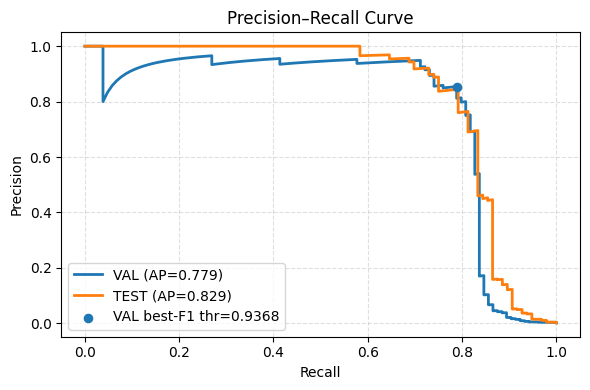

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# --- probs ---
p_val = xgb_tamed.predict_proba(X_val)[:, 1]
p_te  = xgb_tamed.predict_proba(X_te)[:, 1]

# --- PR + AP (VAL) ---
prec_v, rec_v, thr_v = precision_recall_curve(y_val, p_val)
ap_v = average_precision_score(y_val, p_val)
f1_v = 2 * prec_v[:-1] * rec_v[:-1] / (prec_v[:-1] + rec_v[:-1] + 1e-12)
idx_v = f1_v.argmax()
thr_best = float(thr_v[idx_v])

# --- PR + AP (TEST) ---
prec_t, rec_t, _ = precision_recall_curve(y_te, p_te)
ap_t = average_precision_score(y_te, p_te)

# --- plot ---
plt.figure(figsize=(6,4))
plt.plot(rec_v, prec_v, lw=2, label=f"VAL (AP={ap_v:.3f})")
plt.plot(rec_t, prec_t, lw=2, label=f"TEST (AP={ap_t:.3f})")
# mark VAL-opt F1 point
plt.scatter(rec_v[idx_v], prec_v[idx_v], s=35, zorder=5, label=f"VAL best-F1 thr={thr_best:.4f}")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision–Recall Curve")
plt.legend(); plt.grid(True, ls="--", alpha=0.4)
plt.tight_layout(); plt.show()


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:
# Deepchecks Model Evaluation
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import model_evaluation as dc_model_eval

# Eğer X_tr, X_te numpy ise DataFrame'e çevir
import pandas as pd
def to_df(X):
    return pd.DataFrame(X, columns=[f"feat_{i}" for i in range(X.shape[1])]) if not isinstance(X, pd.DataFrame) else X

Xtr_df, Xte_df = to_df(X_tr), to_df(X_te)

cat_cols = list(Xtr_df.select_dtypes(include=['object','category']).columns)

train_ds = Dataset(Xtr_df, label=y_tr, cat_features=cat_cols)
test_ds  = Dataset(Xte_df, label=y_te, cat_features=cat_cols)

suite = dc_model_eval()
result = suite.run(train_ds, test_ds, xgb_tamed)

# Konsolda görmek için
result.show()     # Jupyter ortamında hücre output olarak güzel tablo çıkar

# HTML kaydetmek için
result.save_as_html('deepchecks_eval.html')
print("Saved: deepchecks_eval.html")



<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

Saved: deepchecks_eval.html


***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve

spw = float((y_tr == 0).sum() / (y_tr == 1).sum())

xgb_stronger = XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    tree_method='hist',
    n_jobs=-1,
    random_state=42,
    scale_pos_weight=spw,
    # --- stronger regularisation ---
    max_depth=2,          # ↓ daha sığ ağaç
    min_child_weight=12,  # ↑ bölünme için daha fazla ağırlık
    gamma=0.6,            # ↑ split cezası
    reg_alpha=0.10,       # ↑ L1
    reg_lambda=6.0,       # ↑ L2
    subsample=0.6,        # ↓ satır örnekleme
    colsample_bytree=0.6, # ↓ sütun örnekleme
    learning_rate=0.03,   # ↓ daha muhafazakâr öğrenme
    n_estimators=500,     # ES yoksa daha düşük ağaç sayısı
    max_delta_step=1
)

xgb_stronger.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# VAL → thr (max-F1) → TEST eval (kısa)
p_val = xgb_stronger.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2 * prec[:-1] * rec[:-1] / (prec[:-1] + rec[:-1] + 1e-12)
thr_strong = float(thr[f1.argmax()])

scores_xgb_strong = eval_metric(xgb_stronger, X_tr, y_tr, X_te, y_te, thr=thr_strong)
print(scores_xgb_strong)


threshold: 0.9743

TEST
[[56516    20]
 [   21    75]]
              precision    recall  f1-score   support

           0     0.9996    0.9996    0.9996     56536
           1     0.7895    0.7812    0.7853        96

    accuracy                         0.9993     56632
   macro avg     0.8946    0.8904    0.8925     56632
weighted avg     0.9993    0.9993    0.9993     56632

TEST Average Precision (PR-AUC): 0.645979

TRAIN
[[169990     47]
 [    49    224]]
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997    170037
           1     0.8266    0.8205    0.8235       273

    accuracy                         0.9994    170310
   macro avg     0.9131    0.9101    0.9116    170310
weighted avg     0.9994    0.9994    0.9994    170310

TRAIN Average Precision (PR-AUC): 0.764624
{'thr': 0.9743048548698425, 'test_ap': 0.6459785913851654, 'train_ap': 0.7646235111166343}


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve

spw = float((y_tr == 0).sum() / (y_tr == 1).sum())

xgb_mid = XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    tree_method='hist',
    n_jobs=-1,
    random_state=42,
    scale_pos_weight=spw,
    # -- medium regularisation (1 klik gevşek) --
    max_depth=3,          # ↑ (2→3)
    min_child_weight=10,  # ↓ (12→10)
    gamma=0.4,            # ↓ (0.6→0.4)
    reg_alpha=0.05,       # ↓ (0.10→0.05)
    reg_lambda=5.0,       # ↓ (6.0→5.0)
    subsample=0.7,        # ↑ (0.6→0.7)
    colsample_bytree=0.7, # ↑ (0.6→0.7)
    learning_rate=0.04,   # biraz daha hızlı
    n_estimators=600,     # kapasiteyi koru
    max_delta_step=1
)

xgb_mid.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)

# VAL → thr (max-F1) → TEST eval (kısa)
p_val = xgb_mid.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2 * prec[:-1] * rec[:-1] / (prec[:-1] + rec[:-1] + 1e-12)
thr_mid = float(thr[f1.argmax()])

scores_xgb_mid = eval_metric(xgb_mid, X_tr, y_tr, X_te, y_te, thr=thr_mid)
print(scores_xgb_mid)


threshold: 0.9687

TEST
[[56521    15]
 [   20    76]]
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9997     56536
           1     0.8352    0.7917    0.8128        96

    accuracy                         0.9994     56632
   macro avg     0.9174    0.8957    0.9063     56632
weighted avg     0.9994    0.9994    0.9994     56632

TEST Average Precision (PR-AUC): 0.802893

TRAIN
[[170003     34]
 [    14    259]]
              precision    recall  f1-score   support

           0     0.9999    0.9998    0.9999    170037
           1     0.8840    0.9487    0.9152       273

    accuracy                         0.9997    170310
   macro avg     0.9419    0.9743    0.9575    170310
weighted avg     0.9997    0.9997    0.9997    170310

TRAIN Average Precision (PR-AUC): 0.953941
{'thr': 0.9686821103096008, 'test_ap': 0.8028926676254945, 'train_ap': 0.9539407946372139}


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import precision_recall_curve
import numpy as np

# --- sınıf dengesizliği ağırlığı ---
spw = float((y_tr == 0).sum() / (y_tr == 1).sum())

xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    tree_method='hist',
    n_jobs=-1,
    random_state=42,
    scale_pos_weight=spw,
    max_delta_step=1
)

# --- "mid" çevresinde dağılımlar (discrete listeler) ---
param_dist = {
    'max_depth': [2, 3, 4, 5],
    'min_child_weight': [6, 8, 10, 12, 14],
    'gamma': [0.2, 0.3, 0.4, 0.5, 0.7],
    'reg_alpha': [0.01, 0.03, 0.05, 0.10],
    'reg_lambda': [4.0, 5.0, 6.0, 8.0],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'learning_rate': [0.03, 0.04, 0.05, 0.06],
    'n_estimators': [450, 500, 600, 700, 800]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# n_iter'ı ihtiyacına göre değiştir (örn. 400 → 1,200 fit; 800 → 2,400 fit)
rs = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=600,
    scoring='average_precision',   # PR-AUC
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1,
    refit=True
)

rs.fit(X_tr, y_tr)

best_xgb = rs.best_estimator_
print("Best params (RS):", rs.best_params_)
print("Best CV AP (RS):", rs.best_score_)

# --- VAL → max-F1 eşiği → TEST eval (senin fonksiyonla) ---
p_val = best_xgb.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2 * prec[:-1] * rec[:-1] / (prec[:-1] + rec[:-1] + 1e-12)
thr_best = float(thr[int(np.nanargmax(f1))])

scores = eval_metric(best_xgb, X_tr, y_tr, X_te, y_te, thr=thr_best)
print(scores)
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import precision_recall_curve
import numpy as np

# --- sınıf dengesizliği ağırlığı ---
spw = float((y_tr == 0).sum() / (y_tr == 1).sum())

xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    tree_method='hist',
    n_jobs=-1,
    random_state=42,
    scale_pos_weight=spw,
    max_delta_step=1
)

# --- "mid" çevresinde dağılımlar (discrete listeler) ---
param_dist = {
    'max_depth': [2, 3, 4, 5],
    'min_child_weight': [6, 8, 10, 12, 14],
    'gamma': [0.2, 0.3, 0.4, 0.5, 0.7],
    'reg_alpha': [0.01, 0.03, 0.05, 0.10],
    'reg_lambda': [4.0, 5.0, 6.0, 8.0],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'learning_rate': [0.03, 0.04, 0.05, 0.06],
    'n_estimators': [450, 500, 600, 700, 800]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# n_iter'ı ihtiyacına göre değiştir (örn. 400 → 1,200 fit; 800 → 2,400 fit)
rs = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=600,
    scoring='average_precision',   # PR-AUC
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1,
    refit=True
)

rs.fit(X_tr, y_tr)

best_xgb = rs.best_estimator_
print("Best params (RS):", rs.best_params_)
print("Best CV AP (RS):", rs.best_score_)

# --- VAL → max-F1 eşiği → TEST eval (senin fonksiyonla) ---
p_val = best_xgb.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, p_val)
f1 = 2 * prec[:-1] * rec[:-1] / (prec[:-1] + rec[:-1] + 1e-12)
thr_best = float(thr[int(np.nanargmax(f1))])

scores = eval_metric(best_xgb, X_tr, y_tr, X_te, y_te, thr=thr_best)
print(scores)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
Best params (RS): {'subsample': 0.9, 'reg_lambda': 5.0, 'reg_alpha': 0.05, 'n_estimators': 800, 'min_child_weight': 6, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.9}
Best CV AP (RS): 0.8587420534481112
threshold: 0.6248

TEST
[[56528     8]
 [   20    76]]
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56536
           1     0.9048    0.7917    0.8444        96

    accuracy                         0.9995     56632
   macro avg     0.9522    0.8958    0.9221     56632
weighted avg     0.9995    0.9995    0.9995     56632

TEST Average Precision (PR-AUC): 0.850053

TRAIN
[[170030      7]
 [     0    273]]
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    170037
           1     0.9750    1.0000    0.9873       273

    accuracy                         1.0000    170310
   macro avg     0.

In [ ]:
print("Best params (RS):", rs.best_params_)
# buradasin

NameError: name 'rs' is not defined

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm.

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map.

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf


In [ ]:
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [ ]:
# --- Stratified + Grouped split (20% test, 20% val total) — df değişmez ---

# Features (no Time) + target
X = df.drop(columns=['Class','Time'], errors='ignore').copy()
y = df['Class'].astype(int).copy()

# Identik feature satırları aynı grupta olsun (overlap engeli)
groups = hash_pandas_object(X, index=False).values


# --- TEST: ~20% via 5-fold ---
sgkf_test = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
train_idx, test_idx = next(sgkf_test.split(X, y, groups))

X_tr_base, X_te = X.iloc[train_idx], X.iloc[test_idx]
y_tr_base, y_te   = y.iloc[train_idx], y.iloc[test_idx]
groups_tr         = groups[train_idx]


# --- VAL: ~20% total via 4-fold on train_base (1/4 of 80% ≈ 20%) ---
sgkf_val = StratifiedGroupKFold(n_splits=4, shuffle=True, random_state=42)
tr_idx, val_idx = next(sgkf_val.split(X_tr_base, y_tr_base, groups_tr))

X_tr, X_val = X_tr_base.iloc[tr_idx], X_tr_base.iloc[val_idx]
y_tr, y_val = y_tr_base.iloc[tr_idx], y_tr_base.iloc[val_idx]



# --- Sanity checks ---
print("rates  ->", y_tr.mean(), y_val.mean(), y_te.mean())
print("frauds ->", int((y_tr==1).sum()), int((y_val==1).sum()), int((y_te==1).sum()))

# Overlap kontrolü (gruplar arası)
overlap_groups = len(set(groups[train_idx]) & set(groups[test_idx]))
print("train–test group overlap:", overlap_groups)


rates  -> 0.0016029593094944513 0.0018315018315018315 0.0016951546828648115
frauds -> 273 104 96
train–test group overlap: 0


***ii. Define Model***

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score

# --- Scale features (important for NN)
scaler = StandardScaler().fit(X_tr)
X_tr_s = scaler.transform(X_tr)
X_val_s = scaler.transform(X_val)
X_te_s = scaler.transform(X_te)

# --- Build minimal model
model = keras.Sequential([
    keras.layers.Input(shape=(X_tr_s.shape[1],)),   # input layer
    keras.layers.Dense(64, activation="relu"),      # hidden layer
    keras.layers.Dense(1, activation="sigmoid")     # output (fraud / not fraud)
])







***iii. Compile Model***

In [ ]:
# --- Compile
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=["AUC", "Precision", "Recall"]
)

***iv. Fit Model***

In [ ]:
# --- Fit
history = model.fit(
    X_tr_s, y_tr,
    validation_data=(X_val_s, y_val),
    epochs=20,
    batch_size=4096,
    class_weight={0: 1, 1: float((y_tr == 0).sum() / (y_tr == 1).sum())},  # handle imbalance
    verbose=2
)

Epoch 1/20
42/42 - 6s - 147ms/step - AUC: 0.8961 - Precision: 0.0035 - Recall: 0.8828 - loss: 0.8838 - val_AUC: 0.9406 - val_Precision: 0.0120 - val_Recall: 0.8942 - val_loss: 0.5139
Epoch 2/20
42/42 - 1s - 20ms/step - AUC: 0.9618 - Precision: 0.0225 - Recall: 0.9084 - loss: 0.5535 - val_AUC: 0.9521 - val_Precision: 0.0581 - val_Recall: 0.8846 - val_loss: 0.3162
Epoch 3/20
42/42 - 0s - 6ms/step - AUC: 0.9758 - Precision: 0.0700 - Recall: 0.8938 - loss: 0.4237 - val_AUC: 0.9553 - val_Precision: 0.0856 - val_Recall: 0.8750 - val_loss: 0.2309
Epoch 4/20
42/42 - 0s - 6ms/step - AUC: 0.9832 - Precision: 0.0822 - Recall: 0.9048 - loss: 0.3576 - val_AUC: 0.9519 - val_Precision: 0.0925 - val_Recall: 0.8654 - val_loss: 0.1842
Epoch 5/20
42/42 - 0s - 6ms/step - AUC: 0.9856 - Precision: 0.0803 - Recall: 0.9048 - loss: 0.3185 - val_AUC: 0.9546 - val_Precision: 0.0893 - val_Recall: 0.8654 - val_loss: 0.1566
Epoch 6/20
42/42 - 0s - 7ms/step - AUC: 0.9878 - Precision: 0.0848 - Recall: 0.9158 - loss: 

***v. Prediction and Model Evaluating***

In [ ]:

# --- 1) Olasılıklar
y_prob_tr  = model.predict(X_tr_s).ravel()
y_prob_val = model.predict(X_val_s).ravel()
y_prob_te  = model.predict(X_te_s).ravel()

# --- 2) Eşiği VAL üzerinde belirle (max F1)
prec, rec, thr = precision_recall_curve(y_val, y_prob_val)
f1 = (2*prec*rec)/(prec+rec+1e-12)
best_idx = f1.argmax()
best_thr = thr[best_idx-1] if best_idx > 0 else 0.5
print(f"VAL-opt threshold = {best_thr:.4f}")

def print_block(name, y_true, y_prob, thr):
    y_pred = (y_prob >= thr).astype(int)
    ap  = average_precision_score(y_true, y_prob)
    roc = roc_auc_score(y_true, y_prob)
    cm  = confusion_matrix(y_true, y_pred)
    print(f"\n=== {name} ===")
    print(f"AP (PR-AUC): {ap:.6f} | ROC-AUC: {roc:.6f}")
    print(cm)
    print(classification_report(y_true, y_pred, digits=4))

# --- 3) Ayrı ayrı raporlar
print_block("TRAIN", y_tr, y_prob_tr, best_thr)
print_block("TEST",  y_te, y_prob_te, best_thr)


5323/5323 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
VAL-opt threshold = 0.9985

=== TRAIN ===
AP (PR-AUC): 0.753322 | ROC-AUC: 0.997344
[[170010     27]
 [    68    205]]
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997    170037
           1     0.8836    0.7509    0.8119       273

    accuracy                         0.9994    170310
   macro avg     0.9416    0.8754    0.9058    170310
weighted avg     0.9994    0.9994    0.9994    170310


=== TEST ===
AP (PR-AUC): 0.712024 | ROC-AUC: 0.987040
[[56526    10]
 [   27    69]]
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9997     56536
           1     0.8734    0.7188    0.7886        96

    accuracy                         0.9993     56632
   macro avg     0.9365    0.8593    0.8941     56632
weighted avg     0.9993    0.9993    0.9993     56632



***vi. Plot Precision and Recall Curve***

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:
# ===============================
# Keras Deep MLP for Fraud (no def, simple, strong)
# ===============================
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, classification_report, average_precision_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)
tf.random.set_seed(42)

# ---- Scale (fit only on TRAIN) ----
scaler = StandardScaler()
X_tr_s  = scaler.fit_transform(X_tr)
X_val_s = scaler.transform(X_val)
X_te_s  = scaler.transform(X_te)

# ---- tf.data ----
BATCH = 1024
train_ds = tf.data.Dataset.from_tensor_slices((X_tr_s.astype("float32"), y_tr.astype("float32"))).shuffle(len(y_tr), seed=42).batch(BATCH)
val_ds   = tf.data.Dataset.from_tensor_slices((X_val_s.astype("float32"), y_val.astype("float32"))).batch(BATCH)
test_ds  = tf.data.Dataset.from_tensor_slices((X_te_s.astype("float32"),  y_te.astype("float32"))).batch(BATCH)

# ---- Build model (derin + yeterli kapasite, az dropout) ----
in_dim = X_tr_s.shape[1]
inputs = keras.Input(shape=(in_dim,), name="features")

x = layers.Dense(512, kernel_initializer="he_normal")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation("gelu")(x)
x = layers.Dropout(0.05)(x)

x = layers.Dense(512, kernel_initializer="he_normal")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("gelu")(x)
x = layers.Dropout(0.05)(x)

x = layers.Dense(256, kernel_initializer="he_normal")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("gelu")(x)

x = layers.Dense(128, kernel_initializer="he_normal")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("gelu")(x)

x = layers.Dense(64, kernel_initializer="he_normal")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("gelu")(x)

logits = layers.Dense(1)(x)
probs  = layers.Activation("sigmoid", name="prob")(logits)

model = keras.Model(inputs, probs)

# ---- Compile (focal loss underfit'i azaltır; class_weight gerekmez) ----
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryFocalCrossentropy(gamma=2.0),
    metrics=[keras.metrics.AUC(curve="PR", name="pr_auc"),
             keras.metrics.AUC(curve="ROC", name="roc_auc")]
)

# ---- Callbacks (early stop + lr reduce + checkpoint) ----
ckpt_path = "best_fraud_keras.keras"
cbs = [
    keras.callbacks.ModelCheckpoint(ckpt_path, monitor="val_pr_auc", mode="max", save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor="val_pr_auc", mode="max", patience=8, restore_best_weights=True, verbose=1),
    keras.callbacks.ReduceLROnPlateau(monitor="val_pr_auc", mode="max", patience=3, factor=0.5, min_lr=1e-5, verbose=1),
]

# ---- Train ----
history = model.fit(train_ds, validation_data=val_ds, epochs=60, callbacks=cbs, verbose=1)

# ---- Predict probs ----
p_tr   = model.predict(train_ds, verbose=0).ravel()
p_val  = model.predict(val_ds,   verbose=0).ravel()
p_test = model.predict(test_ds,  verbose=0).ravel()

# (İsteğe bağlı genel sağlık bilgisi)
print("\nVAL AP=%.6f | ROC=%.6f" % (average_precision_score(y_val, p_val), roc_auc_score(y_val, p_val)))
print("TEST AP=%.6f | ROC=%.6f" % (average_precision_score(y_te,  p_test), roc_auc_score(y_te,  p_test)))

# ---- Eşik: VAL'de F1'i maksimize eden threshold (fonksiyonsuz) ----
prec, rec, thr = precision_recall_curve(y_val, p_val)
thr_candidates = np.r_[0.0, thr, 1.0]
f1_scores = []
for t in thr_candidates:
    yhat = (p_val >= t).astype(int)
    tp = np.sum((y_val==1) & (yhat==1))
    fp = np.sum((y_val==0) & (yhat==1))
    fn = np.sum((y_val==1) & (yhat==0))
    prec_t = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    rec_t  = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1_scores.append( (2*prec_t*rec_t) / (prec_t + rec_t) if (prec_t + rec_t) > 0 else 0.0 )
best_thr = float(thr_candidates[int(np.nanargmax(f1_scores))])
print("\n[VAL] Best F1 threshold:", round(best_thr, 6))

# ---- Classification reports ----
from sklearn.metrics import confusion_matrix
yhat_tr   = (p_tr   >= best_thr).astype(int)
yhat_val  = (p_val  >= best_thr).astype(int)
yhat_test = (p_test >= best_thr).astype(int)

print("\nTRAIN classification report:")
print(classification_report(y_tr, yhat_tr, digits=4))
print("TRAIN CM [[TN FP],[FN TP]]:\n", confusion_matrix(y_tr, yhat_tr, labels=[0,1]))

print("\nVAL classification report:")
print(classification_report(y_val, yhat_val, digits=4))
print("VAL CM [[TN FP],[FN TP]]:\n", confusion_matrix(y_val, yhat_val, labels=[0,1]))

print("\nTEST classification report:")
print(classification_report(y_te, yhat_test, digits=4))
print("TEST CM [[TN FP],[FN TP]]:\n", confusion_matrix(y_te, yhat_test, labels=[0,1]))


Epoch 1/60
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0153 - pr_auc: 0.4396 - roc_auc: 0.8433
Epoch 1: val_pr_auc improved from -inf to 0.68789, saving model to best_fraud_keras.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - loss: 0.0152 - pr_auc: 0.4401 - roc_auc: 0.8437 - val_loss: 0.0026 - val_pr_auc: 0.6879 - val_roc_auc: 0.9197 - learning_rate: 0.0010
Epoch 2/60
162/167 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018 - pr_auc: 0.7128 - roc_auc: 0.9277
Epoch 2: val_pr_auc improved from 0.68789 to 0.75369, saving model to best_fraud_keras.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0018 - pr_auc: 0.7114 - roc_auc: 0.9281 - val_loss: 0.0014 - val_pr_auc: 0.7537 - val_roc_auc: 0.9352 - learning_rate: 0.0010
Epoch 3/60
165/167 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.8017e-04 - pr_auc: 0.8404 - roc_auc: 0.9981
Epoch 3: val_pr_auc did not improve from 0.75369
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.7999e-04 - pr_auc: 0.8399 - roc_auc: 0.9981 - val

## 5. Model Deployement
- Finalize your model with whole dataset and prepare for the deployment.

### Save and Export the Best Model


### Save and Export Variables